## Importing modules and preprocessing dataset

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [248]:
df = pd.read_csv("1805793.csv")

In [249]:
df.head(7)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200783734,FAREW foundation,2020-01-30 00:00:00,2020.0,1.930406e+09,2020-01-16,20200116,20200116,20200131.0,USD,RV,1.0,NaN,59902.57,20200116.0,NAA8,1.930406e+09,0
1,U001,0200769623,WAL-MAR,2019-09-11 00:00:00,2019.0,1.929818e+09,2019-09-01,20190831,20190901,20190916.0,USD,RV,1.0,NaN,7724.08,20190901.0,NAH4,1.929818e+09,0
2,U001,0200230690,DECA corp,2019-11-01 00:00:00,2019.0,1.930041e+09,2019-10-22,20191022,20191022,20191108.0,USD,RV,1.0,NaN,8016.86,20191016.0,NAM4,1.930041e+09,0
3,U001,0200772670,ASSOCIAT corporation,2019-02-14 00:00:00,2019.0,1.928710e+09,2019-01-30,20190130,20190130,20190214.0,USD,RV,1.0,NaN,149794.14,20190130.0,NAU5,1.928710e+09,0
4,U001,0200748108,KROGER trust,2019-10-16 00:00:00,2019.0,1.929941e+09,2019-10-01,20190930,20191001,20191016.0,USD,RV,1.0,NaN,15612.81,20191001.0,NAA8,1.929941e+09,0
5,U001,0200803720,DEC in,2020-01-09 00:00:00,2020.0,1.930381e+09,2020-01-09,20200109,20200109,20200111.0,USD,RV,1.0,NaN,29336.82,20200101.0,NAM2,1.930381e+09,0
6,U001,0200592182,DECA llc,2019-10-01 00:00:00,2019.0,1.929918e+09,2019-09-24,20190924,20190924,20191009.0,USD,RV,1.0,NaN,336.72,20190916.0,NAM4,1.929918e+09,0


In [250]:
list(df.columns.sort_values())

['area_business',
 'baseline_create_date',
 'buisness_year',
 'business_code',
 'clear_date',
 'cust_number',
 'cust_payment_terms',
 'doc_id',
 'document type',
 'document_create_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'invoice_id',
 'isOpen',
 'name_customer',
 'posting_date',
 'posting_id',
 'total_open_amount']

Converting Date Columns into datatime data type

In [251]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

To avoid discrepancy between document_create_date and document_create_date.1 we drop document_create_date and instead use document_create_date.1 which norm document_create_date

In [252]:
df.drop(columns = "document_create_date",axis=0,inplace = True)

In [253]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200783734,FAREW foundation,2020-01-30 00:00:00,2020.0,1.930406e+09,2020-01-16,20200116,20200131.0,USD,RV,1.0,NaN,59902.57,20200116.0,NAA8,1.930406e+09,0
1,U001,0200769623,WAL-MAR,2019-09-11 00:00:00,2019.0,1.929818e+09,2019-09-01,20190901,20190916.0,USD,RV,1.0,NaN,7724.08,20190901.0,NAH4,1.929818e+09,0
2,U001,0200230690,DECA corp,2019-11-01 00:00:00,2019.0,1.930041e+09,2019-10-22,20191022,20191108.0,USD,RV,1.0,NaN,8016.86,20191016.0,NAM4,1.930041e+09,0
3,U001,0200772670,ASSOCIAT corporation,2019-02-14 00:00:00,2019.0,1.928710e+09,2019-01-30,20190130,20190214.0,USD,RV,1.0,NaN,149794.14,20190130.0,NAU5,1.928710e+09,0
4,U001,0200748108,KROGER trust,2019-10-16 00:00:00,2019.0,1.929941e+09,2019-10-01,20191001,20191016.0,USD,RV,1.0,NaN,15612.81,20191001.0,NAA8,1.929941e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200793513,KROGER us,NaN,2020.0,1.930654e+09,2020-03-15,20200315,20200330.0,USD,RV,1.0,NaN,154453.90,20200315.0,NAA8,1.930654e+09,1
49996,U001,0200778355,US,NaN,2020.0,1.930583e+09,2020-02-28,20200228,20200331.0,USD,RV,1.0,NaN,11182.05,20200228.0,NA32,1.930583e+09,1
49997,U001,0200762301,C&S WH systems,NaN,2020.0,1.930607e+09,2020-03-30,20200330,20200430.0,USD,RV,1.0,NaN,50597.35,20200330.0,C129,1.930607e+09,1
49998,CA02,0100014810,J.B. H us,NaN,2020.0,2.960619e+09,2020-03-07,20200307,20200323.0,CAD,RV,1.0,NaN,1087.51,20200313.0,CA10,2.960619e+09,1


Converting some str columns in float format to int so that coverting them to datetime datatype doesnt throw any error

In [254]:
date_cols_int = ["due_in_date","baseline_create_date","buisness_year"]

In [255]:
df[date_cols_int] = df[date_cols_int].astype(int)

In [256]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year               int64
doc_id                    float64
posting_date               object
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

Converting all the date columns into datetime format

In [257]:
date_cols_str = ["clear_date","posting_date","document_create_date.1","due_in_date","baseline_create_date"]

In [258]:
df[date_cols_str] = df[date_cols_str].astype(str).apply(pd.to_datetime, format='%Y-%m-%d')

In [259]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200783734,FAREW foundation,2020-01-30,2020,1.930406e+09,2020-01-16,2020-01-16,2020-01-31,USD,RV,1.0,NaN,59902.57,2020-01-16,NAA8,1.930406e+09,0
1,U001,0200769623,WAL-MAR,2019-09-11,2019,1.929818e+09,2019-09-01,2019-09-01,2019-09-16,USD,RV,1.0,NaN,7724.08,2019-09-01,NAH4,1.929818e+09,0
2,U001,0200230690,DECA corp,2019-11-01,2019,1.930041e+09,2019-10-22,2019-10-22,2019-11-08,USD,RV,1.0,NaN,8016.86,2019-10-16,NAM4,1.930041e+09,0
3,U001,0200772670,ASSOCIAT corporation,2019-02-14,2019,1.928710e+09,2019-01-30,2019-01-30,2019-02-14,USD,RV,1.0,NaN,149794.14,2019-01-30,NAU5,1.928710e+09,0
4,U001,0200748108,KROGER trust,2019-10-16,2019,1.929941e+09,2019-10-01,2019-10-01,2019-10-16,USD,RV,1.0,NaN,15612.81,2019-10-01,NAA8,1.929941e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200793513,KROGER us,NaT,2020,1.930654e+09,2020-03-15,2020-03-15,2020-03-30,USD,RV,1.0,NaN,154453.90,2020-03-15,NAA8,1.930654e+09,1
49996,U001,0200778355,US,NaT,2020,1.930583e+09,2020-02-28,2020-02-28,2020-03-31,USD,RV,1.0,NaN,11182.05,2020-02-28,NA32,1.930583e+09,1
49997,U001,0200762301,C&S WH systems,NaT,2020,1.930607e+09,2020-03-30,2020-03-30,2020-04-30,USD,RV,1.0,NaN,50597.35,2020-03-30,C129,1.930607e+09,1
49998,CA02,0100014810,J.B. H us,NaT,2020,2.960619e+09,2020-03-07,2020-03-07,2020-03-23,CAD,RV,1.0,NaN,1087.51,2020-03-13,CA10,2.960619e+09,1


In [260]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [261]:
df.describe()

,buisness_year,doc_id,posting_id,area_business,total_open_amount,invoice_id,isOpen
count,50000.000000,5.000000e+04,50000.0,0.0,50000.000000,4.999400e+04,50000.000000
mean,2019.200980,2.013251e+09,1.0,NaN,32440.958225,2.012352e+09,0.079200
std,0.400737,2.901138e+08,0.0,NaN,39798.202001,2.782951e+08,0.270053
min,2019.000000,1.928502e+09,1.0,NaN,0.530000,1.928502e+09,0.000000
25%,2019.000000,1.929230e+09,1.0,NaN,4746.995000,1.929230e+09,0.000000
50%,2019.000000,1.929803e+09,1.0,NaN,17556.075000,1.929803e+09,0.000000
75%,2019.000000,1.930396e+09,1.0,NaN,47077.237500,1.930396e+09,0.000000
max,2020.000000,9.500000e+09,1.0,NaN,723760.430000,2.960636e+09,1.000000


Identifying columns whose every value is unique

In [262]:
for cols in df.columns:
    print(f"{cols} - {df[f'{cols}'].nunique()}")

business_code - 6
cust_number - 1436
name_customer - 4242
clear_date - 396
buisness_year - 2
doc_id - 50000
posting_date - 501
document_create_date.1 - 502
due_in_date - 540
invoice_currency - 2
document type - 2
posting_id - 1
area_business - 0
total_open_amount - 45331
baseline_create_date - 505
cust_payment_terms - 75
invoice_id - 49994
isOpen - 2


Posting id has the same value for the whole dataset so it wont provide any important feature on its own

In [263]:
df.posting_id.value_counts()

1.0    50000
Name: posting_id, dtype: int64

We see that invoice id has 6 terms missing

In [264]:
df.loc[pd.isna(df["invoice_id"]), :].index

Int64Index([6729, 16098, 26340, 26667, 28097, 28896], dtype='int64')

In [265]:
df.invoice_id.value_counts()

1.929490e+09    1
1.929909e+09    1
1.991832e+09    1
1.929378e+09    1
1.929927e+09    1
               ..
1.928781e+09    1
1.928950e+09    1
1.990568e+09    1
1.928941e+09    1
1.930303e+09    1
Name: invoice_id, Length: 49994, dtype: int64

We see that doc_id and invoice id has every value unique

In [266]:
df.doc_id.value_counts()

1.929490e+09    1
1.929909e+09    1
1.991832e+09    1
1.929378e+09    1
1.929927e+09    1
               ..
1.929239e+09    1
1.930558e+09    1
1.928781e+09    1
1.928950e+09    1
1.930303e+09    1
Name: doc_id, Length: 50000, dtype: int64

Area_business of all the companies has NaN value. So we can drop this column.

In [267]:
df.area_business.isna().sum()

50000

We see that records whose invoice id is missing their document type is X2

In [268]:
df["document type"].value_counts()

RV    49994
X2        6
Name: document type, dtype: int64

In [269]:
df.loc[(df["document type"]== "X2"),:].index

Int64Index([6729, 16098, 26340, 26667, 28097, 28896], dtype='int64')

We see that posting_date and document_create_date.1 are duplicate except in the ones where the document type is X2 and their invoice id is missing. Since their invoice id is missing we will currently drop these rows into a different dataframe and will have some further analysis on them in EDA section as we are seeing a pattern here

In [270]:
df.loc[df['posting_date']!=df['document_create_date.1']]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
6729,CA02,0100054349,PURITY L corporation,2019-05-31,2019,9.500000e+09,2019-03-29,2019-03-15,2019-03-25,CAD,X2,1.0,NaN,631.80,2019-03-15,CA10,NaN,0
16098,CA02,0140104409,LOB,2019-12-27,2019,9.500000e+09,2019-03-29,2018-10-30,2018-11-09,CAD,X2,1.0,NaN,383.64,2018-10-30,CA10,NaN,0
26340,CA02,0140104409,LOB,2019-05-08,2019,9.500000e+09,2019-03-29,2019-02-05,2019-02-15,CAD,X2,1.0,NaN,2635.20,2019-02-05,CA10,NaN,0
26667,CA02,0140104429,COSTCO co,2019-05-02,2019,9.500000e+09,2019-03-29,2019-02-27,2019-03-09,CAD,X2,1.0,NaN,52992.00,2019-02-27,CA10,NaN,0
28097,CA02,0140104409,LOB trust,2019-05-31,2019,9.500000e+09,2019-03-29,2019-03-19,2019-03-29,CAD,X2,1.0,NaN,702.00,2019-03-19,CA10,NaN,0
28896,CA02,0100054173,DIA associates,2019-05-31,2019,9.500000e+09,2019-03-29,2019-01-23,2019-02-02,CAD,X2,1.0,NaN,31200.00,2019-01-23,CA10,NaN,0


## Dropping Rows and Columns

We see that whose invoice id is missing their document type is X2 and posting date is different from document create date. Since their numbers are very less and since invoice_id needs to be unique we can drop these rows into a different dataframe

In [271]:
dropped_rows_df = df.loc[pd.isna(df["invoice_id"]), :]

In [272]:
dropped_rows_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
6729,CA02,0100054349,PURITY L corporation,2019-05-31,2019,9.500000e+09,2019-03-29,2019-03-15,2019-03-25,CAD,X2,1.0,NaN,631.80,2019-03-15,CA10,NaN,0
16098,CA02,0140104409,LOB,2019-12-27,2019,9.500000e+09,2019-03-29,2018-10-30,2018-11-09,CAD,X2,1.0,NaN,383.64,2018-10-30,CA10,NaN,0
26340,CA02,0140104409,LOB,2019-05-08,2019,9.500000e+09,2019-03-29,2019-02-05,2019-02-15,CAD,X2,1.0,NaN,2635.20,2019-02-05,CA10,NaN,0
26667,CA02,0140104429,COSTCO co,2019-05-02,2019,9.500000e+09,2019-03-29,2019-02-27,2019-03-09,CAD,X2,1.0,NaN,52992.00,2019-02-27,CA10,NaN,0
28097,CA02,0140104409,LOB trust,2019-05-31,2019,9.500000e+09,2019-03-29,2019-03-19,2019-03-29,CAD,X2,1.0,NaN,702.00,2019-03-19,CA10,NaN,0
28896,CA02,0100054173,DIA associates,2019-05-31,2019,9.500000e+09,2019-03-29,2019-01-23,2019-02-02,CAD,X2,1.0,NaN,31200.00,2019-01-23,CA10,NaN,0


In [273]:
dropped_rows = dropped_rows = list(df.loc[pd.isna(df["invoice_id"]), :].index)

In [274]:
df.drop(df.index[dropped_rows], inplace=True)

In [275]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200783734,FAREW foundation,2020-01-30,2020,1.930406e+09,2020-01-16,2020-01-16,2020-01-31,USD,RV,1.0,NaN,59902.57,2020-01-16,NAA8,1.930406e+09,0
1,U001,0200769623,WAL-MAR,2019-09-11,2019,1.929818e+09,2019-09-01,2019-09-01,2019-09-16,USD,RV,1.0,NaN,7724.08,2019-09-01,NAH4,1.929818e+09,0
2,U001,0200230690,DECA corp,2019-11-01,2019,1.930041e+09,2019-10-22,2019-10-22,2019-11-08,USD,RV,1.0,NaN,8016.86,2019-10-16,NAM4,1.930041e+09,0
3,U001,0200772670,ASSOCIAT corporation,2019-02-14,2019,1.928710e+09,2019-01-30,2019-01-30,2019-02-14,USD,RV,1.0,NaN,149794.14,2019-01-30,NAU5,1.928710e+09,0
4,U001,0200748108,KROGER trust,2019-10-16,2019,1.929941e+09,2019-10-01,2019-10-01,2019-10-16,USD,RV,1.0,NaN,15612.81,2019-10-01,NAA8,1.929941e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200793513,KROGER us,NaT,2020,1.930654e+09,2020-03-15,2020-03-15,2020-03-30,USD,RV,1.0,NaN,154453.90,2020-03-15,NAA8,1.930654e+09,1
49996,U001,0200778355,US,NaT,2020,1.930583e+09,2020-02-28,2020-02-28,2020-03-31,USD,RV,1.0,NaN,11182.05,2020-02-28,NA32,1.930583e+09,1
49997,U001,0200762301,C&S WH systems,NaT,2020,1.930607e+09,2020-03-30,2020-03-30,2020-04-30,USD,RV,1.0,NaN,50597.35,2020-03-30,C129,1.930607e+09,1
49998,CA02,0100014810,J.B. H us,NaT,2020,2.960619e+09,2020-03-07,2020-03-07,2020-03-23,CAD,RV,1.0,NaN,1087.51,2020-03-13,CA10,2.960619e+09,1


Resetting index to normal value as we dropped rows

In [276]:
df.reset_index(drop=True,inplace=True)

##### Columns that can be dropped:-

- area_business = Since the whole column is just NaN
- posting_id, document type = Since they have constant values they wont provide any information to learn
- doc_id and invoice_id = Every value is unique. They dont affect the sales in any way. Its just a measure to organise the data
- posting_date = Since its equal to document create date after dropping those rows



In [277]:
df.drop(["area_business","posting_id","document type","doc_id","invoice_id","posting_date"], axis = 1, inplace = True)

In [278]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200783734,FAREW foundation,2020-01-30,2020,2020-01-16,2020-01-31,USD,59902.57,2020-01-16,NAA8,0
1,U001,0200769623,WAL-MAR,2019-09-11,2019,2019-09-01,2019-09-16,USD,7724.08,2019-09-01,NAH4,0
2,U001,0200230690,DECA corp,2019-11-01,2019,2019-10-22,2019-11-08,USD,8016.86,2019-10-16,NAM4,0
3,U001,0200772670,ASSOCIAT corporation,2019-02-14,2019,2019-01-30,2019-02-14,USD,149794.14,2019-01-30,NAU5,0
4,U001,0200748108,KROGER trust,2019-10-16,2019,2019-10-01,2019-10-16,USD,15612.81,2019-10-01,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49989,U001,0200793513,KROGER us,NaT,2020,2020-03-15,2020-03-30,USD,154453.90,2020-03-15,NAA8,1
49990,U001,0200778355,US,NaT,2020,2020-02-28,2020-03-31,USD,11182.05,2020-02-28,NA32,1
49991,U001,0200762301,C&S WH systems,NaT,2020,2020-03-30,2020-04-30,USD,50597.35,2020-03-30,C129,1
49992,CA02,0100014810,J.B. H us,NaT,2020,2020-03-07,2020-03-23,CAD,1087.51,2020-03-13,CA10,1


Number of columns which dont have a due date. This will be our test set whose date we have to predict

In [279]:
# No of columns in test Set
df.clear_date.isna().sum()

3960

In [280]:
# No of columns in train_set
df.clear_date.count()

46034

## Splitting into Test set

clear_dates where value is a null value comes under test set

In [281]:
test_set = df[df['clear_date'].isna()]

In [282]:
test_set.reset_index(drop=True,inplace=True)

In [283]:
test_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,CA02,0140104409,LOB in,NaT,2020,2020-03-20,2020-04-03,CAD,124446.29,2020-03-24,CA10,1
1,CA02,0140105686,SYSC corp,NaT,2020,2020-04-03,2020-04-17,CAD,13851.75,2020-04-07,CA10,1
2,CA02,0140104440,SO llc,NaT,2020,2020-03-28,2020-04-12,CAD,33980.64,2020-04-02,CA10,1
3,U001,0200331749,SYSC corp,NaT,2020,2020-03-12,2020-03-27,USD,9169.26,2020-03-12,NAA8,1
4,U001,0100011799,CORN trust,NaT,2020,2020-04-03,2020-05-03,USD,138690.00,2020-04-03,BR12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3955,U001,0200793513,KROGER us,NaT,2020,2020-03-15,2020-03-30,USD,154453.90,2020-03-15,NAA8,1
3956,U001,0200778355,US,NaT,2020,2020-02-28,2020-03-31,USD,11182.05,2020-02-28,NA32,1
3957,U001,0200762301,C&S WH systems,NaT,2020,2020-03-30,2020-04-30,USD,50597.35,2020-03-30,C129,1
3958,CA02,0100014810,J.B. H us,NaT,2020,2020-03-07,2020-03-23,CAD,1087.51,2020-03-13,CA10,1


NOT of an expression can be obtained by using the logical NOT operator

In [284]:
train_set = df[~df['clear_date'].isna()]

In [285]:
train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200783734,FAREW foundation,2020-01-30,2020,2020-01-16,2020-01-31,USD,59902.57,2020-01-16,NAA8,0
1,U001,0200769623,WAL-MAR,2019-09-11,2019,2019-09-01,2019-09-16,USD,7724.08,2019-09-01,NAH4,0
2,U001,0200230690,DECA corp,2019-11-01,2019,2019-10-22,2019-11-08,USD,8016.86,2019-10-16,NAM4,0
3,U001,0200772670,ASSOCIAT corporation,2019-02-14,2019,2019-01-30,2019-02-14,USD,149794.14,2019-01-30,NAU5,0
4,U001,0200748108,KROGER trust,2019-10-16,2019,2019-10-01,2019-10-16,USD,15612.81,2019-10-01,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46029,U001,0200729290,KROGER co,2019-02-04,2019,2019-01-18,2019-02-02,USD,42199.37,2019-01-18,NAA8,0
46030,U001,0200769623,WAL-MAR systems,2019-03-21,2019,2019-03-02,2019-03-17,USD,8857.51,2019-03-02,NAH4,0
46031,U001,0200795490,HY - llc,2020-04-20,2020,2020-02-11,2020-04-16,USD,17066.88,2020-02-11,NAGD,0
46032,U001,0200762301,C&S WH llc,2019-04-02,2019,2019-03-18,2019-04-02,USD,14281.84,2019-03-18,NAC6,0


Now our model cant take in dates for prediction so our target column will not be clear_date.Instead it will be the delay bucket as delay bucket will be in int format on which our model can predict.

After calculating the delay bucket we will add that to the due date to give us the predicted date


In [286]:
# Function will make a new column delay_days in the passed dataframe
def delay_days(dataframe):
    dataframe["delay_days"] = dataframe["clear_date"]-dataframe["due_in_date"]

In [287]:
delay_days(test_set)
delay_days(train_set)

<ipython-input-286-fd3bd8817682>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["delay_days"] = dataframe["clear_date"]-dataframe["due_in_date"]


In [288]:
test_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_days
0,CA02,0140104409,LOB in,NaT,2020,2020-03-20,2020-04-03,CAD,124446.29,2020-03-24,CA10,1,NaT
1,CA02,0140105686,SYSC corp,NaT,2020,2020-04-03,2020-04-17,CAD,13851.75,2020-04-07,CA10,1,NaT
2,CA02,0140104440,SO llc,NaT,2020,2020-03-28,2020-04-12,CAD,33980.64,2020-04-02,CA10,1,NaT
3,U001,0200331749,SYSC corp,NaT,2020,2020-03-12,2020-03-27,USD,9169.26,2020-03-12,NAA8,1,NaT
4,U001,0100011799,CORN trust,NaT,2020,2020-04-03,2020-05-03,USD,138690.00,2020-04-03,BR12,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,U001,0200793513,KROGER us,NaT,2020,2020-03-15,2020-03-30,USD,154453.90,2020-03-15,NAA8,1,NaT
3956,U001,0200778355,US,NaT,2020,2020-02-28,2020-03-31,USD,11182.05,2020-02-28,NA32,1,NaT
3957,U001,0200762301,C&S WH systems,NaT,2020,2020-03-30,2020-04-30,USD,50597.35,2020-03-30,C129,1,NaT
3958,CA02,0100014810,J.B. H us,NaT,2020,2020-03-07,2020-03-23,CAD,1087.51,2020-03-13,CA10,1,NaT


Splitting test_set into X_test and y_test

In [289]:
y_test = test_set["delay_days"]

In [290]:
y_test

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
3955   NaT
3956   NaT
3957   NaT
3958   NaT
3959   NaT
Name: delay_days, Length: 3960, dtype: timedelta64[ns]

In [291]:
X_test = test_set.iloc[:,:-1]

In [292]:
X_test

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,CA02,0140104409,LOB in,NaT,2020,2020-03-20,2020-04-03,CAD,124446.29,2020-03-24,CA10,1
1,CA02,0140105686,SYSC corp,NaT,2020,2020-04-03,2020-04-17,CAD,13851.75,2020-04-07,CA10,1
2,CA02,0140104440,SO llc,NaT,2020,2020-03-28,2020-04-12,CAD,33980.64,2020-04-02,CA10,1
3,U001,0200331749,SYSC corp,NaT,2020,2020-03-12,2020-03-27,USD,9169.26,2020-03-12,NAA8,1
4,U001,0100011799,CORN trust,NaT,2020,2020-04-03,2020-05-03,USD,138690.00,2020-04-03,BR12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3955,U001,0200793513,KROGER us,NaT,2020,2020-03-15,2020-03-30,USD,154453.90,2020-03-15,NAA8,1
3956,U001,0200778355,US,NaT,2020,2020-02-28,2020-03-31,USD,11182.05,2020-02-28,NA32,1
3957,U001,0200762301,C&S WH systems,NaT,2020,2020-03-30,2020-04-30,USD,50597.35,2020-03-30,C129,1
3958,CA02,0100014810,J.B. H us,NaT,2020,2020-03-07,2020-03-23,CAD,1087.51,2020-03-13,CA10,1


## EDA on train_set

Before performing EDA we will sort our Dataset according to document_create_date.1

In [293]:
train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_days
0,U001,0200783734,FAREW foundation,2020-01-30,2020,2020-01-16,2020-01-31,USD,59902.57,2020-01-16,NAA8,0,-1 days
1,U001,0200769623,WAL-MAR,2019-09-11,2019,2019-09-01,2019-09-16,USD,7724.08,2019-09-01,NAH4,0,-5 days
2,U001,0200230690,DECA corp,2019-11-01,2019,2019-10-22,2019-11-08,USD,8016.86,2019-10-16,NAM4,0,-7 days
3,U001,0200772670,ASSOCIAT corporation,2019-02-14,2019,2019-01-30,2019-02-14,USD,149794.14,2019-01-30,NAU5,0,0 days
4,U001,0200748108,KROGER trust,2019-10-16,2019,2019-10-01,2019-10-16,USD,15612.81,2019-10-01,NAA8,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46029,U001,0200729290,KROGER co,2019-02-04,2019,2019-01-18,2019-02-02,USD,42199.37,2019-01-18,NAA8,0,2 days
46030,U001,0200769623,WAL-MAR systems,2019-03-21,2019,2019-03-02,2019-03-17,USD,8857.51,2019-03-02,NAH4,0,4 days
46031,U001,0200795490,HY - llc,2020-04-20,2020,2020-02-11,2020-04-16,USD,17066.88,2020-02-11,NAGD,0,4 days
46032,U001,0200762301,C&S WH llc,2019-04-02,2019,2019-03-18,2019-04-02,USD,14281.84,2019-03-18,NAC6,0,0 days


In [294]:
train_set["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [295]:
train_set["document_create_date.1"].max()

Timestamp('2020-02-27 00:00:00')

In [296]:
sorted_train_set = train_set.sort_values(by = ["document_create_date.1"], ascending = True)

In [297]:
sorted_train_set.reset_index(drop=True,inplace=True)

In [298]:
sorted_train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,0,-5 days
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0 days
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,0,2 days
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,0,1 days
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,0,-5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46029,U001,0200236583,REQU corp,2020-03-09,2020,2020-02-26,2020-03-07,USD,14425.42,2020-02-26,NA10,0,2 days
46030,U001,0200769623,WAL-MAR foundation,2020-03-16,2020,2020-02-26,2020-03-12,USD,4821.85,2020-02-26,NAH4,0,4 days
46031,U001,0200726979,BJ'S llc,2020-03-12,2020,2020-02-26,2020-03-12,USD,657.17,2020-02-26,NAA8,0,0 days
46032,U001,0200780825,SYSCO FO llc,2020-03-19,2020,2020-02-27,2020-03-18,USD,2517.37,2020-02-27,NAD1,0,1 days


### Univariate Analysis

There are no continuous variable columns except the amount in our dataset but even if its varaince is less than 0.1 it cant be removed as it is essential to dataset.Hence there are no quasi-constant columns in this dataset and hence no variance threshold function will be applied

In [299]:
sorted_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46034 entries, 0 to 46033
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   business_code           46034 non-null  object         
 1   cust_number             46034 non-null  object         
 2   name_customer           46034 non-null  object         
 3   clear_date              46034 non-null  datetime64[ns] 
 4   buisness_year           46034 non-null  int64          
 5   document_create_date.1  46034 non-null  datetime64[ns] 
 6   due_in_date             46034 non-null  datetime64[ns] 
 7   invoice_currency        46034 non-null  object         
 8   total_open_amount       46034 non-null  float64        
 9   baseline_create_date    46034 non-null  datetime64[ns] 
 10  cust_payment_terms      46034 non-null  object         
 11  isOpen                  46034 non-null  int64          
 12  delay_days              46034 no

As we see all there is no Null or NaN values in our dataset

In [300]:
# Creating a function to create countplot
def plot_count(target_column, data=None, hue=None, palette=None, color=None, dpi=None, figsize=(6, 6)):
    plt.figure(figsize=figsize, dpi=dpi)
    sns.set_style('darkgrid')
    sns.countplot(x=target_column, data=data, hue=hue, palette=palette, color=color)
    plt.show()

### business_code
- company code of the account

In [301]:
sorted_train_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,0,-5 days
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0 days
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,0,2 days
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,0,1 days
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,0,-5 days


In [302]:
sorted_train_set.business_code.value_counts()

U001    41624
CA02     3661
U013      617
U002      120
U005       10
U007        2
Name: business_code, dtype: int64

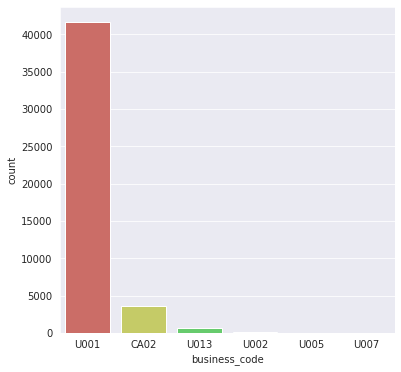

In [303]:
plot_count("business_code", sorted_train_set, palette = "hls")

In [304]:
business_code_dict = dict(sorted_train_set.business_code.value_counts())

Normalising their distribution

In [305]:
for i in business_code_dict:
    business_code_dict[i] = business_code_dict[i]/len(sorted_train_set)

In [306]:
business_code_dict

{'U001': 0.904201242559847,
 'CA02': 0.07952817482730155,
 'U013': 0.013403136811921623,
 'U002': 0.002606768909936134,
 'U005': 0.00021723074249467783,
 'U007': 4.344614849893557e-05}

Since it has only 6 values we can apply one-hot encoding to it.

### cust_number
- customer number given to all the customers of the Account

In [307]:
len(dict(sorted_train_set.cust_number.value_counts()))

1400

It tells us that there are 1440 unique customers or comapnyy that we have transactions.It id related to customer_name.

In [308]:
dict(sorted_train_set.cust_number.value_counts())

{'0200769623': 10286,
 '0200726979': 1748,
 '0200762301': 1308,
 '0200759878': 1239,
 '0200794332': 1066,
 '0200744019': 972,
 '0200772670': 769,
 '200769623': 723,
 '0200705742': 721,
 'CCU013': 671,
 '0200707822': 636,
 '0200418007': 517,
 'CCCA02': 511,
 '0140104409': 496,
 '0140106408': 472,
 '0200780383': 466,
 '0100031704': 408,
 '0200803720': 407,
 '0140104429': 378,
 '0200761734': 364,
 '0200706844': 364,
 '0200416837': 342,
 '0200936373': 335,
 '0200148860': 322,
 '0200230690': 317,
 '0200799367': 317,
 '0200793568': 310,
 '0200353024': 309,
 '0200772595': 307,
 '0200020431': 303,
 '0200704858': 302,
 '0140105686': 286,
 '0140104440': 273,
 '0200974851': 258,
 '0200714710': 213,
 '0200782001': 211,
 '0200729942': 208,
 '0200592182': 195,
 '0140105847': 191,
 '0200781803': 187,
 '0200764795': 183,
 '0200739534': 175,
 '0200900909': 173,
 '0200704045': 171,
 '0200792734': 166,
 '0200763814': 166,
 '0140104423': 163,
 '0200777735': 160,
 '0200792293': 157,
 '0200729290': 156,
 '0

cust_number represent account no of different companies. For eg WAL-MAR has many varities that is WAL-MAR corporation, WAL-MAR trust etc but they have the same cust_number.

Now since they represent different companies we apply a condition and store the values in a list and if a new company comes into test set which isnt in the list then it will be classified as others.

### name_customer
- name of the customer.

In [309]:
dict(sorted_train_set.name_customer.value_counts())

{'WAL-MAR ': 1040,
 'WAL-MAR us': 1040,
 'WAL-MAR corporation': 1032,
 'WAL-MAR foundation': 1024,
 'WAL-MAR systems': 1006,
 'WAL-MAR trust': 995,
 'WAL-MAR corp': 993,
 'WAL-MAR in': 993,
 'WAL-MAR co': 975,
 'WAL-MAR llc': 971,
 'WAL-MAR associates': 940,
 "BJ'S  corporation": 196,
 "BJ'S  trust": 173,
 "BJ'S  in": 172,
 "BJ'S  co": 172,
 "BJ'S  foundation": 171,
 "BJ'S  llc": 170,
 "BJ'S  systems": 170,
 'SA trust': 163,
 "BJ'S  corp": 162,
 'SA us': 159,
 "BJ'S  ": 159,
 'SA corporation': 154,
 "BJ'S  associates": 153,
 "BJ'S  us": 146,
 'C&S WH llc': 143,
 'SA systems': 142,
 'SA foundation': 141,
 'C&S WH trust': 140,
 'C&S WH associates': 138,
 'SA corp': 137,
 'C&S WH us': 137,
 'SA llc': 137,
 'SA co': 134,
 'SA associates': 130,
 'SA ': 130,
 'C&S WH in': 128,
 'C&S WH co': 128,
 'C&S WH foundation': 124,
 'C&S WH corporation': 121,
 'COST corp': 118,
 'COST co': 118,
 'DEC associates': 118,
 'COST trust': 117,
 'COST corporation': 116,
 'SA in': 114,
 'C&S WH systems': 113,

There is a unique cust_number for each company. Like WAL-MAR, WAL-MAR us, etc belong to company WAL-MAR and have a unique customer_num to their name hence this column will be dropped.

### clear_date
- The date on which the customer clears an invoice, or in simple terms, they make the full payment.

In [310]:
sorted_train_set.clear_date.min()

Timestamp('2019-01-03 00:00:00')

In [311]:
sorted_train_set.clear_date.max()

Timestamp('2020-05-21 00:00:00')

So we see that we our clear_date ranges pretty much 1.5 yrs.

Extracting months from clear_dates

In [312]:
clear_month = sorted_train_set.clear_date.dt.month

In [313]:
clear_month.value_counts()

2     5597
3     4808
5     3991
4     3829
12    3657
7     3651
11    3600
8     3500
10    3476
9     3347
1     3301
6     3277
Name: clear_date, dtype: int64

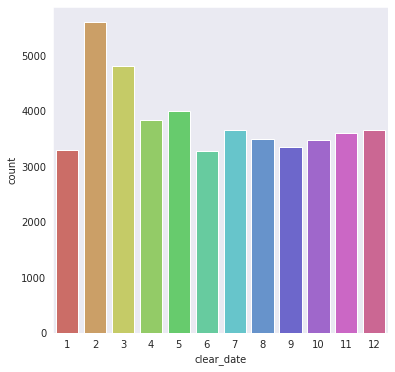

In [314]:
plt.figure(figsize=(6,6))
sns.set_style('dark')
sns.countplot(x=clear_month, palette="hls")
plt.show()

Here we see that Feb id the month maximum companies completed their transactions

Now since clear_dates are from 2019 to the half of 2020 months from Jan- May may have more values. Now observing the dataset according to year of the clear date starting with the year 2019

In [315]:
# For the year 2019
clear_month_2019 = sorted_train_set.loc[train_set.clear_date.dt.year==2019].clear_date.dt.month

In [316]:
clear_month_2019.value_counts()

2     4858
3     4142
5     3481
4     3323
7     3182
12    3150
11    3103
8     3048
10    3020
9     2901
1     2881
6     2856
Name: clear_date, dtype: int64

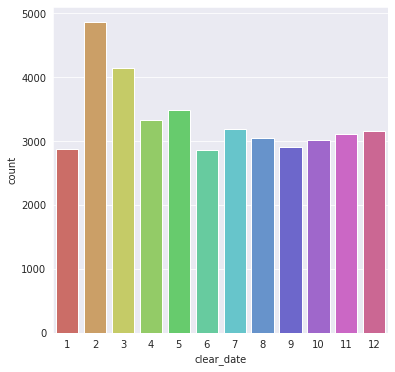

In [317]:
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.countplot(x=clear_month_2019, palette="hls")
plt.show()

For 2019 we see that maximum clear_dates were in the month of May

In [318]:
clear_month_2020 = sorted_train_set.loc[sorted_train_set.clear_date.dt.year==2020].clear_date.dt.month

In [319]:
clear_month_2020.value_counts()

2    2786
1    1722
3    1431
4     126
5      24
Name: clear_date, dtype: int64

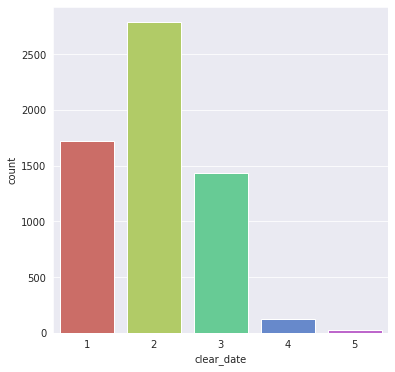

In [320]:
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.countplot(x=clear_month_2020, palette="hls")
plt.show()

But for year 2020 we see that Feb was the month where maximum amount of clear dates was present

### buisness_year
- indicates the year of clear date

In [321]:
sorted_train_set.buisness_year.value_counts()

2019    39945
2020     6089
Name: buisness_year, dtype: int64

This variable could be dropped as it is in one way repetitive or could be one hot encoded. Multivariate analysis might give us some obsservations which might make this column useful

### document_create_date.1
- The date on which the invoice document was created

In [322]:
sorted_train_set["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [323]:
sorted_train_set["document_create_date.1"].max()

Timestamp('2020-02-27 00:00:00')

So we see that it ranges for just over a year

In [324]:
doc_create_month = sorted_train_set["document_create_date.1"].dt.month

In [325]:
doc_create_month.value_counts()

1     6211
2     5821
3     3846
5     3658
4     3613
8     3558
6     3545
10    3501
7     3499
9     3268
11    3239
12    2275
Name: document_create_date.1, dtype: int64

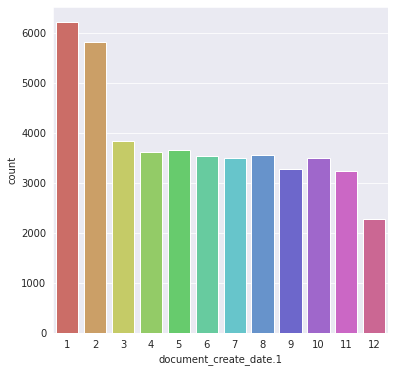

In [326]:
plot_count(doc_create_month, palette = "hls")

We see that document created in each month reduces as we move forward

### due_in_date 
- The date on which the customer is expected to clear an invoice

In [327]:
 sorted_train_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,0,-5 days
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0 days
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,0,2 days
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,0,1 days
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,0,-5 days


In [328]:
sorted_train_set.due_in_date.min()

Timestamp('2018-12-30 00:00:00')

In [329]:
sorted_train_set.due_in_date.max()

Timestamp('2020-06-19 00:00:00')

Due date also ranges for approximately 1.5 yrs

In [330]:
due_date_month = sorted_train_set.due_in_date.dt.month

In [331]:
due_date_month.value_counts()

2     5770
3     4822
4     3844
5     3787
11    3624
6     3577
7     3552
1     3489
10    3488
8     3457
9     3315
12    3309
Name: due_in_date, dtype: int64

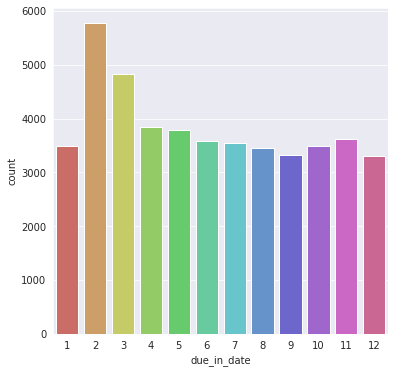

In [332]:
plot_count(due_date_month, palette = "hls")

Maximum companies had to pay their dues by february that is almost 1 month since maximum documents were created in Jan 2019 and as we saw from the above clear_date graph it seems like maximum many companies were sucessful in doing so too.

### invoice_currency
- The currency of the invoice amount in the document for the invoice

In [333]:
sorted_train_set.invoice_currency.value_counts()

USD    42373
CAD     3661
Name: invoice_currency, dtype: int64

We have to change all the Candian Dollars(CAD) into USD for a uniform total_open_amount and then later we can drop this column or combine it with other column

### total_open_amount
- The amount that is yet to be paid for that invoice

In [334]:
open_amount_usd = sorted_train_set.apply(lambda x: x['total_open_amount']*0.79 if x['invoice_currency'] == 'CAD' else x['total_open_amount'], axis=1)

In [335]:
open_amount_usd.min()

0.68

In [336]:
open_amount_usd.max()

723760.43

Since we want to bring the total amount in one unit i.e. USD we will change the values of total_open_amount to USD by multiplying 0.79

In [337]:
sorted_train_set.total_open_amount = sorted_train_set.apply(lambda x: x['total_open_amount']*0.79 if x['invoice_currency'] == 'CAD' else x['total_open_amount'], axis=1)

In [338]:
open_amount_usd.describe()

count     46034.000000
mean      31454.271464
std       37450.463749
min           0.680000
25%        4638.320000
50%       17237.710000
75%       46238.262500
max      723760.430000
dtype: float64

In [339]:
open_amount_usd.median()

17237.71

<AxesSubplot:ylabel='Density'>

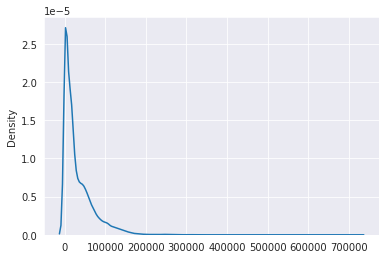

In [340]:
sns.kdeplot(open_amount_usd)

Automatically binning the amount using pd.qcut.

In [341]:
open_amount_bins = pd.qcut(open_amount_usd,q=10)

In [342]:
open_amount_bins.value_counts()

(54540.29, 80712.97]     4606
(7005.068, 12634.41]     4606
(25155.896, 38843.67]    4604
(0.679, 787.736]         4604
(38843.67, 54540.29]     4603
(17237.71, 25155.896]    4603
(2887.896, 7005.068]     4603
(787.736, 2887.896]      4603
(80712.97, 723760.43]    4601
(12634.41, 17237.71]     4601
dtype: int64

We see that while although the number of comapnies in each distribution is same. The distribution itself has some information. For eg:- In The bin (0.679, 787.736] although the amount is very less there are same no. of companies as there are in (80712.97, 723760.43]. This means companies with very high open amount are less

Using this information to define our own bins

In [343]:
amount_bins = [0,5000,10000,50000,100000,750000]
new_open_amount_bin = pd.cut(open_amount_usd, bins = amount_bins)

In [344]:
new_open_amount_bin.value_counts()

(10000, 50000]      19213
(0, 5000]           11894
(50000, 100000]      7493
(5000, 10000]        4536
(100000, 750000]     2898
dtype: int64

We can see that there are many companies who have an average amount left to pay i.e. b/w (10000,50000] and as we thought comapnies with very high amount still left to pay (100000,750000] are very less

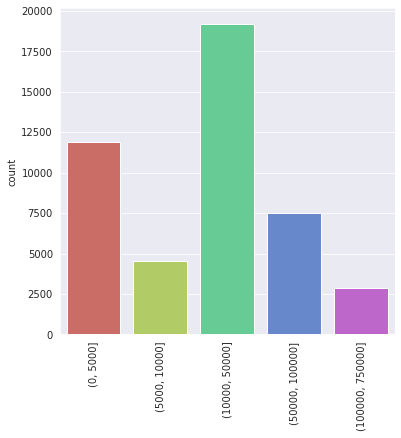

In [345]:
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
sns.countplot(x=new_open_amount_bin, palette="hls")
plt.show()

We can create a new bin column and bin these values and map the same to two validation and test set

### baseline_create_date
- The date on which the Invoice was created.

In [346]:
sorted_train_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,0,-5 days
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0 days
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,0,2 days
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,0,1 days
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,0,-5 days


As we can see from dataset baseline create date and document create date are same. Lets see how many values are present where they are not equal.

In [347]:
baseline_set = sorted_train_set.loc[sorted_train_set["document_create_date.1"]!=sorted_train_set["baseline_create_date"]]
baseline_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay_days
7,CA02,0140106271,LONGO,2019-01-16,2019,2018-12-30,2019-01-12,CAD,41495.3978,2019-01-02,CA10,0,4 days
53,CA02,0140105847,GORDON F in,2019-01-17,2019,2018-12-30,2019-01-10,CAD,2241.4038,2018-12-31,CA10,0,7 days
78,CA02,0140104440,SO in,2019-01-16,2019,2018-12-31,2019-01-12,CAD,70782.4121,2019-01-02,CA10,0,4 days
131,CA02,0140104429,COSTCO foundation,2019-01-18,2019,2018-12-31,2019-01-19,CAD,7061.1622,2019-01-09,CA10,0,-1 days
135,CA02,0140104409,LOB llc,2019-01-11,2019,2018-12-31,2019-01-12,CAD,210183.8924,2019-01-02,CA10,0,-1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45936,CA02,0140106293,ATLANT foundation,2020-03-16,2020,2020-02-26,2020-03-16,CAD,56.1216,2020-03-06,CA10,0,0 days
45949,CA02,0100029649,LES ENTRE,2020-03-06,2020,2020-02-26,2020-03-08,CAD,22077.7350,2020-02-27,CA10,0,-2 days
45955,CA02,0100035069,ITAL co,2020-03-03,2020,2020-02-26,2020-03-08,CAD,2766.4220,2020-02-27,CA10,0,-5 days
45963,CA02,0140104440,SO systems,2020-03-17,2020,2020-02-26,2020-03-08,CAD,74283.8975,2020-02-27,CA10,0,9 days


There are just above 5000 values where they are not the same. And if we see in the first glance it looks like if the company is canadian there is a delay in filing the document and creating an invoice. 

In [348]:
baseline_set.invoice_currency.value_counts()

CAD    3001
USD    2110
Name: invoice_currency, dtype: int64

We see that almost all of the companies whose invoice currency was CAD(total = 3661) have a delay between document create date and baseline date.

But since at the end we are changing all of the open invoices to USD its better to drop this column as it is kind of repetitive with document_create_date.1

### cust_payment_terms
- Business terms and agreements between customers and accounts on discounts and days of payment

In [349]:
cust_payment_dict = dict(sorted_train_set.cust_payment_terms.value_counts())

In [350]:
for key,values in cust_payment_dict.items():
    if values<10:
        key = "others"
    else:
        key

In [351]:
cust_payment_dict

{'NAA8': 18610,
 'NAH4': 12164,
 'CA10': 3574,
 'NAC6': 1530,
 'NAM4': 1258,
 'NAAX': 1144,
 'NAD1': 885,
 'NAG2': 837,
 'NAU5': 798,
 'NAGD': 729,
 'NAX2': 678,
 'NA32': 676,
 'NAM2': 526,
 'NA10': 401,
 'NAD5': 312,
 'NAVE': 285,
 'NAVF': 235,
 'NAM1': 221,
 'NAAW': 206,
 'NAWU': 120,
 'NAWN': 99,
 'NAVQ': 97,
 'NAVR': 93,
 'NAWP': 83,
 'NAUZ': 61,
 'NACB': 44,
 'NAVM': 41,
 'NA3B': 38,
 'NA38': 27,
 'NABG': 27,
 'CA30': 26,
 'NAB1': 20,
 'C106': 16,
 'NAVL': 16,
 'NAD4': 13,
 'NA84': 13,
 'NA3F': 12,
 'BR56': 10,
 'NAVD': 9,
 'NA9X': 9,
 'NAUP': 9,
 'NAM3': 8,
 'NA25': 7,
 'NA8Q': 6,
 'CAB1': 5,
 '90M7': 5,
 'NATX': 4,
 'NAD8': 4,
 'NATH': 4,
 'B052': 3,
 'BR12': 3,
 'NAVC': 3,
 'NATJ': 3,
 'CAX2': 2,
 'NATL': 2,
 'B112': 2,
 'MC15': 2,
 'NA31': 2,
 'NAV2': 2,
 'NATM': 2,
 'NABD': 2,
 'NAWM': 1,
 'NAUX': 1,
 'NANC': 1,
 'NATW': 1,
 'NAUN': 1,
 'NATZ': 1,
 'NAV9': 1,
 'NATK': 1,
 'NACE': 1,
 'NAUY': 1,
 'NATV': 1}

In [352]:
cust_payment_dict

{'NAA8': 18610,
 'NAH4': 12164,
 'CA10': 3574,
 'NAC6': 1530,
 'NAM4': 1258,
 'NAAX': 1144,
 'NAD1': 885,
 'NAG2': 837,
 'NAU5': 798,
 'NAGD': 729,
 'NAX2': 678,
 'NA32': 676,
 'NAM2': 526,
 'NA10': 401,
 'NAD5': 312,
 'NAVE': 285,
 'NAVF': 235,
 'NAM1': 221,
 'NAAW': 206,
 'NAWU': 120,
 'NAWN': 99,
 'NAVQ': 97,
 'NAVR': 93,
 'NAWP': 83,
 'NAUZ': 61,
 'NACB': 44,
 'NAVM': 41,
 'NA3B': 38,
 'NA38': 27,
 'NABG': 27,
 'CA30': 26,
 'NAB1': 20,
 'C106': 16,
 'NAVL': 16,
 'NAD4': 13,
 'NA84': 13,
 'NA3F': 12,
 'BR56': 10,
 'NAVD': 9,
 'NA9X': 9,
 'NAUP': 9,
 'NAM3': 8,
 'NA25': 7,
 'NA8Q': 6,
 'CAB1': 5,
 '90M7': 5,
 'NATX': 4,
 'NAD8': 4,
 'NATH': 4,
 'B052': 3,
 'BR12': 3,
 'NAVC': 3,
 'NATJ': 3,
 'CAX2': 2,
 'NATL': 2,
 'B112': 2,
 'MC15': 2,
 'NA31': 2,
 'NAV2': 2,
 'NATM': 2,
 'NABD': 2,
 'NAWM': 1,
 'NAUX': 1,
 'NANC': 1,
 'NATW': 1,
 'NAUN': 1,
 'NATZ': 1,
 'NAV9': 1,
 'NATK': 1,
 'NACE': 1,
 'NAUY': 1,
 'NATV': 1}

As we said what will we do with cust_number similar thing can be done here. We will apply a condition and store the values in a list and if a new term comes into test set which isnt in the list then it will be classified as others.

### isOpen
- Tells whether a transaction is open or closed

In [353]:
sorted_train_set.isOpen.value_counts()

0    46034
Name: isOpen, dtype: int64

We see that this is a constant value. Thats because all the data present in our data have a clear date. If we dont have clear_date its value is open saying the amount is yet to be cleared. Hence we will drop this column

In [354]:
sorted_train_set.drop(["isOpen"],axis=1,inplace=True)

In [355]:
sorted_train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5 days
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0 days
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2 days
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1 days
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5 days
...,...,...,...,...,...,...,...,...,...,...,...,...
46029,U001,0200236583,REQU corp,2020-03-09,2020,2020-02-26,2020-03-07,USD,14425.42,2020-02-26,NA10,2 days
46030,U001,0200769623,WAL-MAR foundation,2020-03-16,2020,2020-02-26,2020-03-12,USD,4821.85,2020-02-26,NAH4,4 days
46031,U001,0200726979,BJ'S llc,2020-03-12,2020,2020-02-26,2020-03-12,USD,657.17,2020-02-26,NAA8,0 days
46032,U001,0200780825,SYSCO FO llc,2020-03-19,2020,2020-02-27,2020-03-18,USD,2517.37,2020-02-27,NAD1,1 days


### delay_days
- clear_date - due_date i.e. it tells how much delay did we do in paying.
    - "-" indicates it has been paid off before due date
    - "+" indicates it has been paid off after the due date
- Target column

In [356]:
sorted_train_set.delay_days.describe()

count                         46034
mean      0 days 23:09:51.371594908
std      11 days 01:15:22.685043108
min              -80 days +00:00:00
25%               -3 days +00:00:00
50%                 0 days 00:00:00
75%                 2 days 00:00:00
max               314 days 00:00:00
Name: delay_days, dtype: object

In [357]:
sorted_train_set.delay_days.dtypes

dtype('<m8[ns]')

In [358]:
delay_list = sorted_train_set.delay_days

In [359]:
delay_list = pd.to_timedelta(delay_list, errors='coerce').dt.days

Changing the dtype of delay_days to show only days and be in int format so that we can use it for analysis.

In [360]:
sorted_train_set.delay_days = pd.to_timedelta(sorted_train_set.delay_days, errors='coerce').dt.days

In [361]:
sorted_train_set.delay_days.head()

0   -5
1    0
2    2
3    1
4   -5
Name: delay_days, dtype: int64

In [362]:
sorted_train_set.delay_days.head()

0   -5
1    0
2    2
3    1
4   -5
Name: delay_days, dtype: int64

In [363]:
delay_list.describe()

count    46034.000000
mean         0.965178
std         11.052346
min        -80.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        314.000000
Name: delay_days, dtype: float64

<AxesSubplot:ylabel='delay_days'>

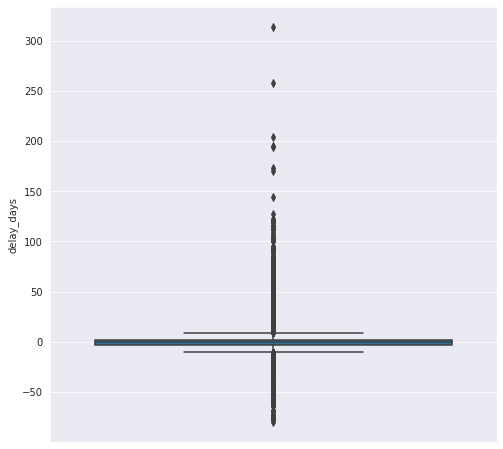

In [364]:
plt.figure(figsize=(8,8))
sns.boxplot(y = delay_list)

We see here that maximum companies records have delay_date = 0 so this means maximum companies have paid off their bills within 10 days (+/-) of the due date.

In [365]:
delay_bins = [-100,-10,0,10,100,400]
delay_bucket = pd.cut(delay_list, bins = delay_bins)

In [366]:
delay_bucket.value_counts()

(-10, 0]       25475
(0, 10]        17083
(10, 100]       2330
(-100, -10]     1104
(100, 400]        42
Name: delay_days, dtype: int64

As we had seen from the graph maximum companies payed off their invoices within 10 days.

Looking for outliers

In [367]:
# mean (+/-) 3*std
delay_days_mean, delay_days_std = delay_list.mean(), delay_list.std()
cutoff = delay_days_std*3
lower, upper = delay_days_mean-cutoff, delay_days_mean+cutoff

In [368]:
outliers_removed = [x for x in delay_list if x<lower or x>upper]

In [369]:
lower

-32.19185976312985

In [370]:
upper

34.12221558708605

In [371]:
len(outliers_removed)

1259

In [372]:
# Using IQR method
q75, q25 = delay_list.quantile(0.75), delay_list.quantile(0.25)
iqr = q75-q25

In [373]:
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [374]:
lower

-10.5

In [375]:
upper

9.5

In [376]:
outliers = [x for x in delay_list if x<lower or x>upper]

In [377]:
len(outliers)

3541

As we see on applying both the formulas of outliers we are getting some outliers. Logically payment done before 32 days is a plus point and similarly payment done after 34 days is still good enough. Hence I believe they arent the right parameters to consider an outlier. 

The only basis of outlier we can see is if the company takes more than 100 days to pay back the amount. As we can see from our dataset the highest days after which a payment was done is 314 days. Hence we can apply a condition that if delay_days >100 then its outlier.

### Multivariate Analysis

# Remove this

2 points: 1. Yes we don't use target column for feature engg. 2. If you created an feature and that feature has high coorelation then you should use it but if the features used to create that feature were already highly correlated then its a problem. 

In [378]:
sorted_train_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5


#### Relation b/w business_code and total_open_amount

In [379]:
avg_amount_code = sorted_train_set.groupby("business_code").total_open_amount.mean()

In [380]:
avg_amount_code

business_code
CA02    46849.561005
U001    30232.621148
U002    31098.904083
U005     9014.280000
U007     2368.400000
U013    23047.518606
Name: total_open_amount, dtype: float64

In [381]:
sorted_train_set.groupby("business_code").total_open_amount.median()

business_code
CA02    23998.2013
U001    16915.3850
U002    21396.4350
U005    10323.2400
U007     2368.4000
U013    14424.1700
Name: total_open_amount, dtype: float64

Relation b/w business_code with invoice_currency

In [382]:
sorted_train_set.groupby("business_code").invoice_currency.value_counts()

business_code  invoice_currency
CA02           CAD                  3661
U001           USD                 41624
U002           USD                   120
U005           USD                    10
U007           USD                     2
U013           USD                   617
Name: invoice_currency, dtype: int64

We see that the first two letters of business_code represent the invoice currency in which invoice was carried out. We see that despite far less no. of Canadian companies their mean and median total_open_amount is greater than US companies. So we can drop either of business_code or invoice_currency since they represent the same thing. I think its better to drop invoice currency since our total_open_amount is already in **"USD"** 

<AxesSubplot:xlabel='business_code', ylabel='Avg Total Amount'>

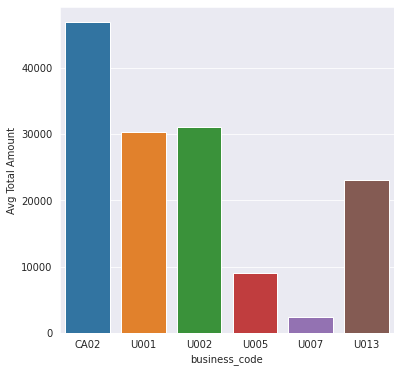

In [383]:
plt.figure(figsize=(6,6))
plt.ylabel("Avg Total Amount")
sns.barplot(x=avg_amount_code.index, y=avg_amount_code.values)

<Figure size 720x720 with 0 Axes>

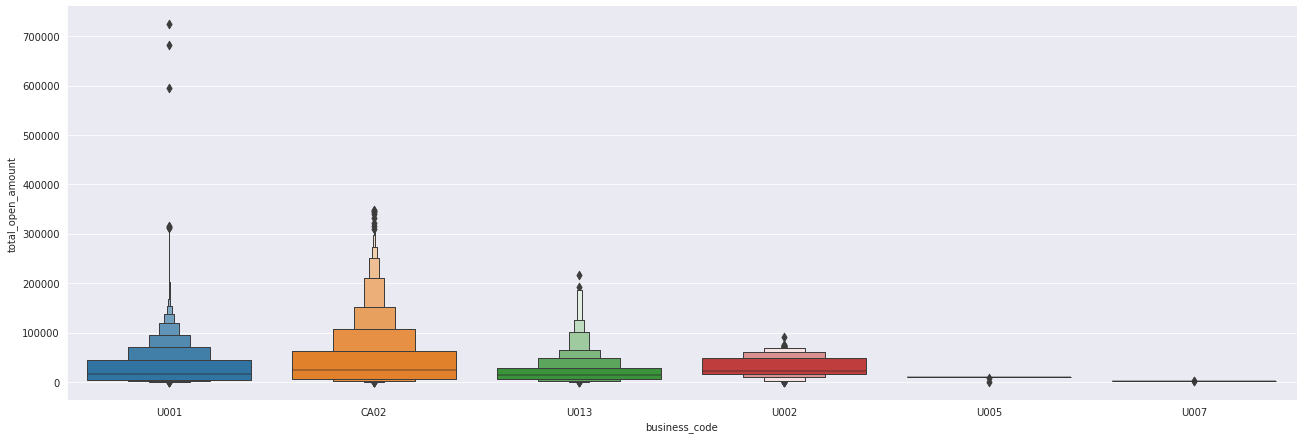

In [384]:
plt.figure(figsize=(10,10))
sns.catplot(y = "total_open_amount", x = "business_code",data = sorted_train_set.sort_values("total_open_amount", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

#### Relation b/w cust_number and Total_open_amount

In [385]:
avg_amount_cust_num = sorted_train_set.groupby("cust_number").total_open_amount.mean()

In [386]:
avg_amount_cust_num

cust_number
0100000048    56480.592500
0100000051    36547.700000
0100000158    58052.960000
0100000217    21646.692000
0100000222    27639.905161
                  ...     
CC7455        15863.253333
CCCA02        22398.366164
CCU001        27058.878234
CCU002        25865.636513
CCU013        13011.461392
Name: total_open_amount, Length: 1400, dtype: float64

After changing the values of rare labels to others this will be more useful

In [387]:
sorted_train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...
46029,U001,0200236583,REQU corp,2020-03-09,2020,2020-02-26,2020-03-07,USD,14425.42,2020-02-26,NA10,2
46030,U001,0200769623,WAL-MAR foundation,2020-03-16,2020,2020-02-26,2020-03-12,USD,4821.85,2020-02-26,NAH4,4
46031,U001,0200726979,BJ'S llc,2020-03-12,2020,2020-02-26,2020-03-12,USD,657.17,2020-02-26,NAA8,0
46032,U001,0200780825,SYSCO FO llc,2020-03-19,2020,2020-02-27,2020-03-18,USD,2517.37,2020-02-27,NAD1,1


Relation between cust_number and delay_days

In [388]:
avg_delay_cust_num = sorted_train_set.groupby("cust_number").delay_days.mean()

In [389]:
median_delay_cust_num = sorted_train_set.groupby("cust_number").delay_days.median()

In [390]:
avg_delay_cust_num

cust_number
0100000048    47.250000
0100000051    -1.000000
0100000158    35.000000
0100000217    -0.800000
0100000222    -2.032258
                ...    
CC7455        20.777778
CCCA02         9.072407
CCU001         5.560000
CCU002         6.421053
CCU013        42.688525
Name: delay_days, Length: 1400, dtype: float64

In [391]:
median_delay_cust_num

cust_number
0100000048    44.0
0100000051    -1.0
0100000158    35.0
0100000217    -1.0
0100000222    -3.0
              ... 
CC7455        14.0
CCCA02         9.0
CCU001         6.0
CCU002         5.0
CCU013        42.0
Name: delay_days, Length: 1400, dtype: float64

This will be more clear when we will classify all rare labels as OTHERS. But as we can see now the delay days have almost a normal distribution over each customer num since their median and mean are almost same.

Relation between invoice_currency and total_open_amount

In [392]:
sorted_train_set.groupby("invoice_currency").total_open_amount.mean()

invoice_currency
CAD    46849.561005
USD    30124.128330
Name: total_open_amount, dtype: float64

Relation between total_open_amount and delay_bucket

In [393]:
pd.crosstab(index = new_open_amount_bin, columns = delay_bucket)

delay_days,"(-100, -10]","(-10, 0]","(0, 10]","(10, 100]","(100, 400]"
row_0,,,,,
"(0, 5000]",442,7087,3729,617,19
"(5000, 10000]",152,2321,1720,340,3
"(10000, 50000]",385,10404,7334,1075,15
"(50000, 100000]",108,4167,2993,223,2
"(100000, 750000]",17,1496,1307,75,3


<AxesSubplot:xlabel='Amount bin', ylabel='count'>

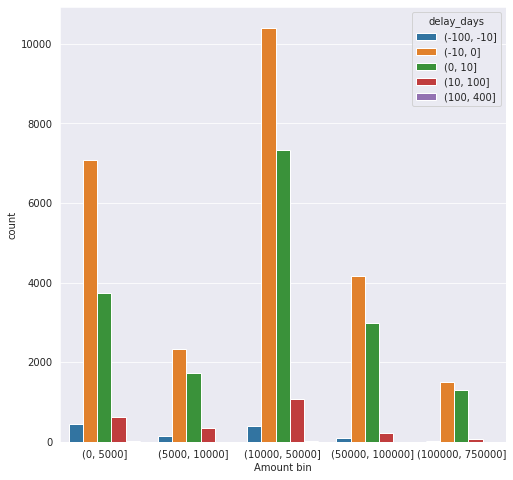

In [394]:
plt.figure(figsize=(8,8))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

As we can see from the graph for each buket maximum times the amount was returned 10-0 days before

Avg delay days per clear date month

In [395]:
keys = [i for i in range(1,13)]
values = []
for i in range(1,13):
    values.append(sorted_train_set.loc[sorted_train_set.clear_date.dt.month == i].delay_days.mean())

In [396]:
avg_delay_clear = dict(zip(keys, values))

In [397]:
avg_delay_clear

{1: -0.8288397455316571,
 2: -0.22333392889047704,
 3: 1.007279534109817,
 4: 0.12457560720814834,
 5: 2.4845903282385366,
 6: 1.1498321635642357,
 7: 0.6970692960832648,
 8: 2.2302857142857144,
 9: 0.9040932178069914,
 10: 0.9030494821634062,
 11: 2.544722222222222,
 12: 1.021602406343998}

<AxesSubplot:>

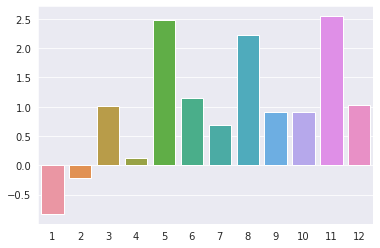

In [398]:
sns.barplot(x=keys, y=values)

Avg delay days per document create date month

In [399]:
keys = [i for i in range(1,13)]
values = []
for i in range(1,13):
    values.append(sorted_train_set.loc[sorted_train_set["document_create_date.1"].dt.month == i].delay_days.mean())

In [400]:
avg_delay_create = dict(zip(keys, values))

In [401]:
avg_delay_create

{1: 1.7338592819191756,
 2: 0.08503693523449579,
 3: 1.0366614664586584,
 4: 1.5034597287572655,
 5: 1.3108255877528705,
 6: 1.33737658674189,
 7: 1.3961131751929123,
 8: 1.0039347948285553,
 9: 0.8212974296205631,
 10: 0.927734932876321,
 11: 0.4998456313677061,
 12: -0.7894505494505495}

<AxesSubplot:>

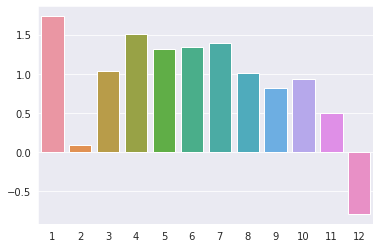

In [402]:
sns.barplot(x=keys, y=values)

Relation between business_code and cust_payment_terms

In [403]:
keys = [i for i in sorted_train_set.business_code.unique()]
values = []
for i in sorted_train_set.business_code.unique():
    values.append(sorted_train_set.cust_payment_terms.loc[sorted_train_set.business_code==f"{i}"].unique())

In [404]:
dict(zip(keys,values))

{'U001': array(['NAH4', 'NAA8', 'NA10', 'NAC6', 'NAX2', 'NAAX', 'NAD1', 'NAAW',
        'NAD5', 'NAU5', 'NAVQ', 'NA32', 'NACB', 'NAM4', 'NAM2', 'NAM1',
        'NAG2', 'NAVM', 'NAWP', 'NA9X', 'NABG', 'NA3B', 'NAWM', 'NABD',
        'NAM3', 'NAD4', 'NAB1', 'NAGD', 'C106', 'NAVL', 'NAV2', 'NANC',
        'NA3F', 'BR56', 'NATH', 'NATJ', 'NA84', 'NA8Q', 'B052', 'NATK',
        'NAVR', 'NA31', 'NAWN', 'NATL', 'NAV9', 'NATM', 'BR12', 'B112',
        'NAWU', 'NAVF', 'NATV', '90M7', 'NAD8', 'NATW', 'NATX', 'NATZ',
        'NACE'], dtype=object),
 'CA02': array(['CA10', 'CAX2', 'NAX2', 'CA30', 'NAG2', 'CAB1', 'NAA8'],
       dtype=object),
 'U013': array(['NAVE', 'NAUZ', 'NAUP', 'NAVF', 'NAUY', 'NA25', 'NAUX', 'NAVC',
        'NAVD', 'NAB1', 'MC15', 'NAUN'], dtype=object),
 'U002': array(['NA38', 'NAG2', 'NAB1'], dtype=object),
 'U005': array(['NAD5'], dtype=object),
 'U007': array(['NAG2'], dtype=object)}

Relation between document_create_date.1 and baseline_create_date

In [405]:
sorted_train_set.loc[sorted_train_set["document_create_date.1"]!=sorted_train_set["baseline_create_date"]]

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
7,CA02,0140106271,LONGO,2019-01-16,2019,2018-12-30,2019-01-12,CAD,41495.3978,2019-01-02,CA10,4
53,CA02,0140105847,GORDON F in,2019-01-17,2019,2018-12-30,2019-01-10,CAD,2241.4038,2018-12-31,CA10,7
78,CA02,0140104440,SO in,2019-01-16,2019,2018-12-31,2019-01-12,CAD,70782.4121,2019-01-02,CA10,4
131,CA02,0140104429,COSTCO foundation,2019-01-18,2019,2018-12-31,2019-01-19,CAD,7061.1622,2019-01-09,CA10,-1
135,CA02,0140104409,LOB llc,2019-01-11,2019,2018-12-31,2019-01-12,CAD,210183.8924,2019-01-02,CA10,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
45936,CA02,0140106293,ATLANT foundation,2020-03-16,2020,2020-02-26,2020-03-16,CAD,56.1216,2020-03-06,CA10,0
45949,CA02,0100029649,LES ENTRE,2020-03-06,2020,2020-02-26,2020-03-08,CAD,22077.7350,2020-02-27,CA10,-2
45955,CA02,0100035069,ITAL co,2020-03-03,2020,2020-02-26,2020-03-08,CAD,2766.4220,2020-02-27,CA10,-5
45963,CA02,0140104440,SO systems,2020-03-17,2020,2020-02-26,2020-03-08,CAD,74283.8975,2020-02-27,CA10,9


## Splitting the dataset

In [406]:
sorted_train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...
46029,U001,0200236583,REQU corp,2020-03-09,2020,2020-02-26,2020-03-07,USD,14425.42,2020-02-26,NA10,2
46030,U001,0200769623,WAL-MAR foundation,2020-03-16,2020,2020-02-26,2020-03-12,USD,4821.85,2020-02-26,NAH4,4
46031,U001,0200726979,BJ'S llc,2020-03-12,2020,2020-02-26,2020-03-12,USD,657.17,2020-02-26,NAA8,0
46032,U001,0200780825,SYSCO FO llc,2020-03-19,2020,2020-02-27,2020-03-18,USD,2517.37,2020-02-27,NAD1,1


Now to split into further two validation sets we split it into a 80-10-10 ratio

In [407]:
sorted_train_set["document_create_date.1"].quantile(0.8)

Timestamp('2019-11-18 00:00:00')

As we see the date at 80 percentile is given above. Now we have to split the data till the last occurence of this date since the next validation set will start after this date. If this date goes on for very long say till 85th percentile then we will select the date that occured just before this 80th percentile date

In [408]:
split_index = (sorted_train_set.loc[sorted_train_set["document_create_date.1"] == sorted_train_set["document_create_date.1"].quantile(0.8)].last_valid_index())

In [409]:
split_index

36839

In [410]:
split_index/len(sorted_train_set)

0.8002563322761437

So we see the last occuring index of the date is almost at the 80% of data. So we will split till our split index or in other words since all the dates are in ascending order we will take all the dataset that occurs before this date

In [411]:
train_set_1 = sorted_train_set.loc[sorted_train_set["document_create_date.1"] <= sorted_train_set["document_create_date.1"].quantile(0.8)].copy()

In [412]:
train_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5
...,...,...,...,...,...,...,...,...,...,...,...,...
36835,U001,0200759878,SA corporation,2019-12-03,2019,2019-11-18,2019-12-03,USD,84365.38,2019-11-18,NAH4,0
36836,U001,0200769623,WAL-MAR associates,2019-11-29,2019,2019-11-18,2019-12-03,USD,32000.18,2019-11-18,NAH4,-4
36837,U001,0200762301,C&S WH llc,2019-12-03,2019,2019-11-18,2019-12-03,USD,131268.83,2019-11-18,NAC6,0
36838,U001,CCU013,KRAFT F foundation,2019-12-20,2019,2019-11-18,2019-11-18,USD,11999.30,2019-11-18,NAX2,32


Now we have to split the remaining dataset into 2 validation_sets

In [413]:
validation_set = pd.concat([sorted_train_set, train_set_1]).drop_duplicates(keep=False).copy()

Now breaking down this expression. Since train_set_1 is subset of sorted_train_set we concatenate train_set_1 on sorted_train_set which adds the rows below the sorted_train_set. Now we will have two rows of everything till index 36840. Then we apply drop_duplicates on it which will drop the duplicate rows and we pass the keep parameter to False to drop the orignal row too. Basically we are dropping all the duplicate rows. Hence this expression

In [414]:
validation_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
36840,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.43,2019-11-19,NAA8,5
36841,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.00,2019-11-19,NAG2,-4
36842,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.17,2019-11-19,NAA8,2
36843,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.32,2019-11-19,NAA8,1
36844,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.63,2019-11-19,NAD1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46029,U001,0200236583,REQU corp,2020-03-09,2020,2020-02-26,2020-03-07,USD,14425.42,2020-02-26,NA10,2
46030,U001,0200769623,WAL-MAR foundation,2020-03-16,2020,2020-02-26,2020-03-12,USD,4821.85,2020-02-26,NAH4,4
46031,U001,0200726979,BJ'S llc,2020-03-12,2020,2020-02-26,2020-03-12,USD,657.17,2020-02-26,NAA8,0
46032,U001,0200780825,SYSCO FO llc,2020-03-19,2020,2020-02-27,2020-03-18,USD,2517.37,2020-02-27,NAD1,1


In [415]:
validation_set.reset_index(drop=True,inplace=True)

In [416]:
validation_set

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.43,2019-11-19,NAA8,5
1,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.00,2019-11-19,NAG2,-4
2,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.17,2019-11-19,NAA8,2
3,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.32,2019-11-19,NAA8,1
4,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.63,2019-11-19,NAD1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9179,U001,0200236583,REQU corp,2020-03-09,2020,2020-02-26,2020-03-07,USD,14425.42,2020-02-26,NA10,2
9180,U001,0200769623,WAL-MAR foundation,2020-03-16,2020,2020-02-26,2020-03-12,USD,4821.85,2020-02-26,NAH4,4
9181,U001,0200726979,BJ'S llc,2020-03-12,2020,2020-02-26,2020-03-12,USD,657.17,2020-02-26,NAA8,0
9182,U001,0200780825,SYSCO FO llc,2020-03-19,2020,2020-02-27,2020-03-18,USD,2517.37,2020-02-27,NAD1,1


Now we will split this whole validation dataset into two equal validation sets one for tuning hyperparameter and one for checking model performance and accuracy

In [417]:
validation_set["document_create_date.1"].quantile(0.50)

Timestamp('2020-01-14 00:00:00')

In [418]:
validation_split_index = (validation_set.loc[validation_set["document_create_date.1"] == validation_set["document_create_date.1"].quantile(0.50)].last_valid_index())

In [419]:
validation_split_index

4643

In [420]:
validation_split_index/len(validation_set)

0.5055531358885017

As done above in train set we do the same here. Since the value is 50% of the validation dataset and 10% of the complete we will split till this row for the first validation set and the rest will be the validation_set_2

In [421]:
valid_set_1 = validation_set.loc[validation_set["document_create_date.1"] <= validation_set["document_create_date.1"].quantile(0.50)].copy()

In [422]:
valid_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.4300,2019-11-19,NAA8,5
1,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.0000,2019-11-19,NAG2,-4
2,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.1700,2019-11-19,NAA8,2
3,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.3200,2019-11-19,NAA8,1
4,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.6300,2019-11-19,NAD1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4639,U001,0100050962,HIGHLAN co,2020-02-19,2020,2020-01-14,2020-02-13,USD,6272.0000,2020-01-14,NAD5,6
4640,CA02,0140104429,COSTCO llc,2020-01-27,2020,2020-01-14,2020-01-26,CAD,56600.4506,2020-01-16,CA10,1
4641,U001,0200769623,WAL-MAR in,2020-01-24,2020,2020-01-14,2020-01-29,USD,41970.1700,2020-01-14,NAH4,-5
4642,U013,0100047799,WALM llc,2020-03-04,2020,2020-01-14,2020-02-28,USD,66398.4000,2020-01-14,NAVF,5


Splitting into the other validation dataset using the same expression we used to make the whole validation dataset

In [423]:
valid_set_2 = pd.concat([validation_set, valid_set_1]).drop_duplicates(keep=False).copy()

In [424]:
valid_set_2 

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
4644,U001,0200749782,KROG foundation,2020-01-30,2020,2020-01-15,2020-01-30,USD,99238.29,2020-01-15,NAA8,0
4645,U001,0200657619,SOTO corp,2020-02-13,2020,2020-01-15,2020-02-16,USD,14465.92,2020-01-15,NA32,-3
4646,U001,0200337148,COAS llc,2020-01-30,2020,2020-01-15,2020-01-30,USD,51156.43,2020-01-15,NAA8,0
4647,U001,0200707822,PUBLI,2020-01-31,2020,2020-01-15,2020-01-30,USD,557.17,2020-01-15,NAA8,1
4648,U001,0200772670,ASSOCIAT systems,2020-02-03,2020,2020-01-15,2020-01-30,USD,2200.01,2020-01-15,NAU5,4
...,...,...,...,...,...,...,...,...,...,...,...,...
9179,U001,0200236583,REQU corp,2020-03-09,2020,2020-02-26,2020-03-07,USD,14425.42,2020-02-26,NA10,2
9180,U001,0200769623,WAL-MAR foundation,2020-03-16,2020,2020-02-26,2020-03-12,USD,4821.85,2020-02-26,NAH4,4
9181,U001,0200726979,BJ'S llc,2020-03-12,2020,2020-02-26,2020-03-12,USD,657.17,2020-02-26,NAA8,0
9182,U001,0200780825,SYSCO FO llc,2020-03-19,2020,2020-02-27,2020-03-18,USD,2517.37,2020-02-27,NAD1,1


In [425]:
train_set_1.shape

(36840, 12)

In [426]:
valid_set_1.shape

(4644, 12)

In [427]:
valid_set_2.shape

(4540, 12)

We will split it into X and y after some feature engineering 

## Feature Engineering 

In [428]:
train_set_1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5


### Handling rare labels and encoding them

Now each cust_number represents different company and we can drop the name customer column. We have explained the reason in cust_number during EDA. Now we have to change rare and new labels to others since they dont come many times in column and then we will take their average total_open_amount

Similarly cust_payment_terms like cust_number there are many rare labels and some new labels might come in test set since cust payment terms is related to the difference of baseline create date and document date.

Handling "OTHERS" in cust_number first

In [429]:
company_dict = dict(train_set_1.cust_number.value_counts())

In [430]:
company_dict

{'0200769623': 7976,
 '0200726979': 1340,
 '0200762301': 1045,
 '0200759878': 938,
 '0200794332': 802,
 '0200744019': 772,
 '200769623': 702,
 '0200772670': 642,
 '0200705742': 572,
 'CCU013': 558,
 '0200707822': 499,
 'CCCA02': 430,
 '0200418007': 421,
 '0140104409': 395,
 '0200780383': 372,
 '0140106408': 356,
 '0100031704': 307,
 '0140104429': 303,
 '0200706844': 291,
 '0200761734': 285,
 '0200803720': 282,
 '0200936373': 264,
 '0200799367': 259,
 '0200793568': 253,
 '0200704858': 251,
 '0200772595': 248,
 '0200148860': 246,
 '0200416837': 243,
 '0140105686': 238,
 '0200353024': 238,
 '0200020431': 229,
 '0200230690': 228,
 '0140104440': 224,
 '0200974851': 213,
 '0200714710': 185,
 '0200729942': 171,
 '0200782001': 156,
 '0140105847': 152,
 '0200900909': 150,
 '0200592182': 149,
 '0200764795': 146,
 '0200781803': 145,
 '0200739534': 137,
 '0200763814': 137,
 '0200792734': 134,
 '0200777735': 133,
 '0200792293': 130,
 '0200704045': 130,
 '0200331749': 130,
 '0200729290': 129,
 '0200

In [431]:
len(company_dict)

1338

We cant determine what new company can come in our database but we can always determine which company we havent seen and which company we have seen more than a given no. of times. Hence we put all the companies which we have seen in a list. Then we check from cust_number whether that no. is present in the list. If its not it will be classified as others

In [432]:
seen_companies = []
for key,values in company_dict.items():
    if values>3:
        seen_companies.append(key)

In [433]:
len(seen_companies)

579

In [434]:
for company in train_set_1.cust_number:
    if company not in seen_companies:
        train_set_1["cust_number"].replace({f"{company}":"OTHERS"},inplace=True)

In [435]:
# Mapping frequency of each company to dictionary and Normalising them
company_freq = train_set_1.cust_number.value_counts()/len(train_set_1)

**Since the cardinality of the column is so high we can use frequency encoding here. We replace the cust_number with the freq_count of them occuring. Freq encoding seems to work well with colummns that have high cardinality**

In [436]:
# making a new col by mapping to cust_number
train_set_1["cust_freq"] = train_set_1.cust_number.map(company_freq)

In [437]:
train_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5,0.216504
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0.006732
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2,0.002660
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1,0.216504
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5,0.216504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,U001,0200759878,SA corporation,2019-12-03,2019,2019-11-18,2019-12-03,USD,84365.38,2019-11-18,NAH4,0,0.025461
36836,U001,0200769623,WAL-MAR associates,2019-11-29,2019,2019-11-18,2019-12-03,USD,32000.18,2019-11-18,NAH4,-4,0.216504
36837,U001,0200762301,C&S WH llc,2019-12-03,2019,2019-11-18,2019-12-03,USD,131268.83,2019-11-18,NAC6,0,0.028366
36838,U001,CCU013,KRAFT F foundation,2019-12-20,2019,2019-11-18,2019-11-18,USD,11999.30,2019-11-18,NAX2,32,0.015147


Mapping the same in valid_set_1

In [438]:
for company in valid_set_1.cust_number:
    if company not in seen_companies:
        valid_set_1["cust_number"].replace({f"{company}":"OTHERS"},inplace=True)

In [439]:
valid_set_1["cust_freq"] = valid_set_1.cust_number.map(company_freq)

In [440]:
valid_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq
0,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.4300,2019-11-19,NAA8,5,0.001846
1,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.0000,2019-11-19,NAG2,-4,0.003393
2,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.1700,2019-11-19,NAA8,2,0.020955
3,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.3200,2019-11-19,NAA8,1,0.000217
4,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.6300,2019-11-19,NAD1,1,0.003393
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,U001,0100050962,HIGHLAN co,2020-02-19,2020,2020-01-14,2020-02-13,USD,6272.0000,2020-01-14,NAD5,6,0.000190
4640,CA02,0140104429,COSTCO llc,2020-01-27,2020,2020-01-14,2020-01-26,CAD,56600.4506,2020-01-16,CA10,1,0.008225
4641,U001,0200769623,WAL-MAR in,2020-01-24,2020,2020-01-14,2020-01-29,USD,41970.1700,2020-01-14,NAH4,-5,0.216504
4642,U013,OTHERS,WALM llc,2020-03-04,2020,2020-01-14,2020-02-28,USD,66398.4000,2020-01-14,NAVF,5,0.031515


**Doing the same thing we did now in cust_payment terms i.e. changing very rare labels and new labels to others first and then frequency encode them**

In [441]:
(train_set_1.cust_payment_terms.value_counts() < 3).sum()

18

In [442]:
terms_dict = dict(train_set_1.cust_payment_terms.value_counts())

In [443]:
seen_terms = []
for key,values in terms_dict.items():
    if values>3:
        seen_terms.append(key)

In [444]:
len(seen_terms)

46

In [445]:
for term in train_set_1.cust_payment_terms:
    if term not in seen_terms:
        train_set_1["cust_payment_terms"].replace({f"{term}":"OTHERS"},inplace=True)

In [446]:
# Mapping freq of each terms to dictionary
terms_freq = train_set_1.cust_payment_terms.value_counts()/len(train_set_1)

In [447]:
terms_freq

NAA8      0.404886
NAH4      0.259772
CA10      0.078855
NAC6      0.033822
NAM4      0.025543
NAAX      0.024131
NAG2      0.019001
NAD1      0.019001
NAU5      0.018187
NAGD      0.015879
NAX2      0.015309
NA32      0.015011
NAM2      0.010586
NA10      0.008388
NAD5      0.007329
NAVE      0.006705
NAVF      0.005592
NAAW      0.004533
NAM1      0.004289
NAWU      0.003230
NAWN      0.002687
NAVR      0.002524
NAVQ      0.002362
NAWP      0.001602
NAUZ      0.001466
OTHERS    0.001086
NACB      0.001031
NA3B      0.001004
NAVM      0.000977
NA38      0.000624
CA30      0.000597
NABG      0.000489
C106      0.000434
NAB1      0.000407
NAVL      0.000299
NA3F      0.000271
NAD4      0.000271
BR56      0.000244
NA9X      0.000244
NA84      0.000217
NAUP      0.000217
NAM3      0.000190
NAVD      0.000190
NA25      0.000163
NA8Q      0.000136
CAB1      0.000109
NATH      0.000109
Name: cust_payment_terms, dtype: float64

In [448]:
# Frequency Encoding
train_set_1["payment_terms_freq"] = train_set_1.cust_payment_terms.map(terms_freq)

In [449]:
train_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq,payment_terms_freq
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5,0.216504,0.259772
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0.006732,0.404886
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2,0.002660,0.404886
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1,0.216504,0.259772
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5,0.216504,0.259772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,U001,0200759878,SA corporation,2019-12-03,2019,2019-11-18,2019-12-03,USD,84365.38,2019-11-18,NAH4,0,0.025461,0.259772
36836,U001,0200769623,WAL-MAR associates,2019-11-29,2019,2019-11-18,2019-12-03,USD,32000.18,2019-11-18,NAH4,-4,0.216504,0.259772
36837,U001,0200762301,C&S WH llc,2019-12-03,2019,2019-11-18,2019-12-03,USD,131268.83,2019-11-18,NAC6,0,0.028366,0.033822
36838,U001,CCU013,KRAFT F foundation,2019-12-20,2019,2019-11-18,2019-11-18,USD,11999.30,2019-11-18,NAX2,32,0.015147,0.015309


Mapping the same to valid_set_1

In [450]:
for term in valid_set_1.cust_payment_terms:
    if term not in seen_terms:
        valid_set_1["cust_payment_terms"].replace({f"{term}":"OTHERS"},inplace=True)

In [451]:
valid_set_1["payment_terms_freq"] = valid_set_1.cust_payment_terms.map(terms_freq)

In [452]:
valid_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq,payment_terms_freq
0,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.4300,2019-11-19,NAA8,5,0.001846,0.404886
1,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.0000,2019-11-19,NAG2,-4,0.003393,0.019001
2,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.1700,2019-11-19,NAA8,2,0.020955,0.404886
3,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.3200,2019-11-19,NAA8,1,0.000217,0.404886
4,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.6300,2019-11-19,NAD1,1,0.003393,0.019001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,U001,0100050962,HIGHLAN co,2020-02-19,2020,2020-01-14,2020-02-13,USD,6272.0000,2020-01-14,NAD5,6,0.000190,0.007329
4640,CA02,0140104429,COSTCO llc,2020-01-27,2020,2020-01-14,2020-01-26,CAD,56600.4506,2020-01-16,CA10,1,0.008225,0.078855
4641,U001,0200769623,WAL-MAR in,2020-01-24,2020,2020-01-14,2020-01-29,USD,41970.1700,2020-01-14,NAH4,-5,0.216504,0.259772
4642,U013,OTHERS,WALM llc,2020-03-04,2020,2020-01-14,2020-02-28,USD,66398.4000,2020-01-14,NAVF,5,0.031515,0.005592


**Making a new feature by taking Average total_open_amount per cust number.**

In [453]:
avg_amount_cust_num = dict(train_set_1.groupby("cust_number").total_open_amount.mean())

In [454]:
avg_amount_cust_num

{'0100000048': 56480.5925,
 '0100000217': 21646.692000000003,
 '0100000222': 30262.139565217396,
 '0100001196': 23254.614788732397,
 '0100001222': 1140.058,
 '0100004335': 45636.93199999999,
 '0100004536': 39687.70933333334,
 '0100006311': 20495.460625,
 '0100007796': 1006.24,
 '0100007916': 21900.079999999998,
 '0100008001': 15808.7575,
 '0100009932': 12289.41103448276,
 '0100011958': 14734.647692307693,
 '0100012638': 32051.116250000003,
 '0100012991': 15870.723960000001,
 '0100013335': 17925.447500000002,
 '0100014187': 69230.33,
 '0100014724': 106619.83699999998,
 '0100015455': 22353.305,
 '0100015557': 18445.23833333333,
 '0100016691': 15515.130000000001,
 '0100021489': 11097.78096,
 '0100021540': 14993.200952380954,
 '0100024776': 9729.163076923076,
 '0100025470': 7345.705,
 '0100025658': 9601.65,
 '0100025890': 47835.0825,
 '0100026809': 18053.731666666667,
 '0100026939': 9341.06,
 '0100027362': 21882.210000000003,
 '0100028210': 7953.5725,
 '0100028450': 20986.591666666667,
 '0

In [455]:
train_set_1["avg_amount_cust_num"] = train_set_1.cust_number.map(avg_amount_cust_num)

In [456]:
train_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq,payment_terms_freq,avg_amount_cust_num
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5,0.216504,0.259772,22397.669156
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0.006732,0.404886,49858.303065
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2,0.002660,0.404886,18641.525408
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1,0.216504,0.259772,22397.669156
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5,0.216504,0.259772,22397.669156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,U001,0200759878,SA corporation,2019-12-03,2019,2019-11-18,2019-12-03,USD,84365.38,2019-11-18,NAH4,0,0.025461,0.259772,36675.384829
36836,U001,0200769623,WAL-MAR associates,2019-11-29,2019,2019-11-18,2019-12-03,USD,32000.18,2019-11-18,NAH4,-4,0.216504,0.259772,22397.669156
36837,U001,0200762301,C&S WH llc,2019-12-03,2019,2019-11-18,2019-12-03,USD,131268.83,2019-11-18,NAC6,0,0.028366,0.033822,46524.272871
36838,U001,CCU013,KRAFT F foundation,2019-12-20,2019,2019-11-18,2019-11-18,USD,11999.30,2019-11-18,NAX2,32,0.015147,0.015309,12732.557749


Mapping to valid_set_1

In [457]:
valid_set_1["avg_amount_cust_num"] = valid_set_1.cust_number.map(avg_amount_cust_num)

In [458]:
valid_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq,payment_terms_freq,avg_amount_cust_num
0,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.4300,2019-11-19,NAA8,5,0.001846,0.404886,46657.753382
1,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.0000,2019-11-19,NAG2,-4,0.003393,0.019001,25735.842320
2,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.1700,2019-11-19,NAA8,2,0.020955,0.404886,26017.760505
3,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.3200,2019-11-19,NAA8,1,0.000217,0.404886,30346.032500
4,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.6300,2019-11-19,NAD1,1,0.003393,0.019001,17304.953520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,U001,0100050962,HIGHLAN co,2020-02-19,2020,2020-01-14,2020-02-13,USD,6272.0000,2020-01-14,NAD5,6,0.000190,0.007329,5854.030000
4640,CA02,0140104429,COSTCO llc,2020-01-27,2020,2020-01-14,2020-01-26,CAD,56600.4506,2020-01-16,CA10,1,0.008225,0.078855,26930.059182
4641,U001,0200769623,WAL-MAR in,2020-01-24,2020,2020-01-14,2020-01-29,USD,41970.1700,2020-01-14,NAH4,-5,0.216504,0.259772,22397.669156
4642,U013,OTHERS,WALM llc,2020-03-04,2020,2020-01-14,2020-02-28,USD,66398.4000,2020-01-14,NAVF,5,0.031515,0.005592,30835.749336


Due to high cardinality we can also use mean encoding here.
Mean Encoding is a type of target encoding.The idea is quite simple. Say you have a categorical variable and a target – can be binary or continuous, it doesn’t matter. For each distinct element in you’re going to compute the average of the corresponding values in . Then you’re going to replace each with the according mean.

But these also means we are at high risk of overfitting.Hence there are two ways we can use with mean encoding. K-Fold Cross Validation cant be used in time realted dataset. Hence we will use additive smoothing.

Applying mean encoding on X_train

In [459]:
def calc_smooth_mean(df, feature, target, m):
    # m means weight which we have to tweak
    # Compute the global mean
    mean = df[target].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(feature)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value feature the according smoothed mean
    return df[feature].map(smooth)

In [460]:
train_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq,payment_terms_freq,avg_amount_cust_num
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5,0.216504,0.259772,22397.669156
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0.006732,0.404886,49858.303065
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2,0.002660,0.404886,18641.525408
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1,0.216504,0.259772,22397.669156
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5,0.216504,0.259772,22397.669156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,U001,0200759878,SA corporation,2019-12-03,2019,2019-11-18,2019-12-03,USD,84365.38,2019-11-18,NAH4,0,0.025461,0.259772,36675.384829
36836,U001,0200769623,WAL-MAR associates,2019-11-29,2019,2019-11-18,2019-12-03,USD,32000.18,2019-11-18,NAH4,-4,0.216504,0.259772,22397.669156
36837,U001,0200762301,C&S WH llc,2019-12-03,2019,2019-11-18,2019-12-03,USD,131268.83,2019-11-18,NAC6,0,0.028366,0.033822,46524.272871
36838,U001,CCU013,KRAFT F foundation,2019-12-20,2019,2019-11-18,2019-11-18,USD,11999.30,2019-11-18,NAX2,32,0.015147,0.015309,12732.557749


For this we will use train_set_1 since it has delay column in it

In [461]:
train_set_1["avg_delay_per_cust"] = calc_smooth_mean(train_set_1, feature="cust_number", target="delay_days",m=500)

In [462]:
train_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5,0.216504,0.259772,22397.669156,-2.057813
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0.006732,0.404886,49858.303065,1.029386
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2,0.002660,0.404886,18641.525408,1.402977
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1,0.216504,0.259772,22397.669156,-2.057813
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5,0.216504,0.259772,22397.669156,-2.057813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,U001,0200759878,SA corporation,2019-12-03,2019,2019-11-18,2019-12-03,USD,84365.38,2019-11-18,NAH4,0,0.025461,0.259772,36675.384829,1.159931
36836,U001,0200769623,WAL-MAR associates,2019-11-29,2019,2019-11-18,2019-12-03,USD,32000.18,2019-11-18,NAH4,-4,0.216504,0.259772,22397.669156,-2.057813
36837,U001,0200762301,C&S WH llc,2019-12-03,2019,2019-11-18,2019-12-03,USD,131268.83,2019-11-18,NAC6,0,0.028366,0.033822,46524.272871,0.579923
36838,U001,CCU013,KRAFT F foundation,2019-12-20,2019,2019-11-18,2019-11-18,USD,11999.30,2019-11-18,NAX2,32,0.015147,0.015309,12732.557749,23.370492


In [463]:
valid_set_1["avg_delay_per_cust"] = calc_smooth_mean(train_set_1, feature="cust_number", target="delay_days",m=500)

In [464]:
valid_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust
0,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.4300,2019-11-19,NAA8,5,0.001846,0.404886,46657.753382,-2.057813
1,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.0000,2019-11-19,NAG2,-4,0.003393,0.019001,25735.842320,1.029386
2,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.1700,2019-11-19,NAA8,2,0.020955,0.404886,26017.760505,1.402977
3,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.3200,2019-11-19,NAA8,1,0.000217,0.404886,30346.032500,-2.057813
4,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.6300,2019-11-19,NAD1,1,0.003393,0.019001,17304.953520,-2.057813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,U001,0100050962,HIGHLAN co,2020-02-19,2020,2020-01-14,2020-02-13,USD,6272.0000,2020-01-14,NAD5,6,0.000190,0.007329,5854.030000,9.556089
4640,CA02,0140104429,COSTCO llc,2020-01-27,2020,2020-01-14,2020-01-26,CAD,56600.4506,2020-01-16,CA10,1,0.008225,0.078855,26930.059182,1.160555
4641,U001,0200769623,WAL-MAR in,2020-01-24,2020,2020-01-14,2020-01-29,USD,41970.1700,2020-01-14,NAH4,-5,0.216504,0.259772,22397.669156,-2.057813
4642,U013,OTHERS,WALM llc,2020-03-04,2020,2020-01-14,2020-02-28,USD,66398.4000,2020-01-14,NAVF,5,0.031515,0.005592,30835.749336,-0.172603


In [465]:
train_set_1["avg_delay_per_term"] = calc_smooth_mean(train_set_1, feature="cust_payment_terms", target="delay_days",m=100)

In [466]:
train_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,NAH4,-5,0.216504,0.259772,22397.669156,-2.057813,-1.856608
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,NAA8,0,0.006732,0.404886,49858.303065,1.029386,1.502437
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,NAA8,2,0.002660,0.404886,18641.525408,1.402977,1.502437
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,NAH4,1,0.216504,0.259772,22397.669156,-2.057813,-1.856608
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,NAH4,-5,0.216504,0.259772,22397.669156,-2.057813,-1.856608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,U001,0200759878,SA corporation,2019-12-03,2019,2019-11-18,2019-12-03,USD,84365.38,2019-11-18,NAH4,0,0.025461,0.259772,36675.384829,1.159931,-1.856608
36836,U001,0200769623,WAL-MAR associates,2019-11-29,2019,2019-11-18,2019-12-03,USD,32000.18,2019-11-18,NAH4,-4,0.216504,0.259772,22397.669156,-2.057813,-1.856608
36837,U001,0200762301,C&S WH llc,2019-12-03,2019,2019-11-18,2019-12-03,USD,131268.83,2019-11-18,NAC6,0,0.028366,0.033822,46524.272871,0.579923,0.448437
36838,U001,CCU013,KRAFT F foundation,2019-12-20,2019,2019-11-18,2019-11-18,USD,11999.30,2019-11-18,NAX2,32,0.015147,0.015309,12732.557749,23.370492,37.231319


In [467]:
valid_set_1["avg_delay_per_term"] = calc_smooth_mean(train_set_1, feature="cust_payment_terms", target="delay_days",m=100)

In [468]:
valid_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,delay_days,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term
0,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.4300,2019-11-19,NAA8,5,0.001846,0.404886,46657.753382,-2.057813,-1.856608
1,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.0000,2019-11-19,NAG2,-4,0.003393,0.019001,25735.842320,1.029386,1.502437
2,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.1700,2019-11-19,NAA8,2,0.020955,0.404886,26017.760505,1.402977,1.502437
3,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.3200,2019-11-19,NAA8,1,0.000217,0.404886,30346.032500,-2.057813,-1.856608
4,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.6300,2019-11-19,NAD1,1,0.003393,0.019001,17304.953520,-2.057813,-1.856608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,U001,0100050962,HIGHLAN co,2020-02-19,2020,2020-01-14,2020-02-13,USD,6272.0000,2020-01-14,NAD5,6,0.000190,0.007329,5854.030000,9.556089,6.006521
4640,CA02,0140104429,COSTCO llc,2020-01-27,2020,2020-01-14,2020-01-26,CAD,56600.4506,2020-01-16,CA10,1,0.008225,0.078855,26930.059182,1.160555,1.502437
4641,U001,0200769623,WAL-MAR in,2020-01-24,2020,2020-01-14,2020-01-29,USD,41970.1700,2020-01-14,NAH4,-5,0.216504,0.259772,22397.669156,-2.057813,-1.856608
4642,U013,OTHERS,WALM llc,2020-03-04,2020,2020-01-14,2020-02-28,USD,66398.4000,2020-01-14,NAVF,5,0.031515,0.005592,30835.749336,-0.172603,-6.338524


Since we have encoded cust_number, cust_payment_terms we can now drop them 

### Extracting months and days from dates

Our model cant work with dates hence we have to extract important features from it that is day and month

We wont be using clear date as at the end we have to predict the clear date at the end and if we use clear_date we it will overfit. Also because clear_date will be null in the test set.

In [469]:
train_set_1["doc_create_day"] = train_set_1["document_create_date.1"].dt.day
train_set_1["doc_create_month"] = train_set_1["document_create_date.1"].dt.month

train_set_1["due_day"] = train_set_1["due_in_date"].dt.day
train_set_1["due_month"] = train_set_1["due_in_date"].dt.month

train_set_1["baseline_day"] = train_set_1["baseline_create_date"].dt.day
train_set_1["baseline_month"] = train_set_1["baseline_create_date"].dt.month

In [470]:
train_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,...,0.259772,22397.669156,-2.057813,-1.856608,30,12,14,1,30,12
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,...,0.404886,49858.303065,1.029386,1.502437,30,12,14,1,30,12
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,...,0.404886,18641.525408,1.402977,1.502437,30,12,14,1,30,12
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,...,0.259772,22397.669156,-2.057813,-1.856608,30,12,14,1,30,12
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,...,0.259772,22397.669156,-2.057813,-1.856608,30,12,14,1,30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,U001,0200759878,SA corporation,2019-12-03,2019,2019-11-18,2019-12-03,USD,84365.38,2019-11-18,...,0.259772,36675.384829,1.159931,-1.856608,18,11,3,12,18,11
36836,U001,0200769623,WAL-MAR associates,2019-11-29,2019,2019-11-18,2019-12-03,USD,32000.18,2019-11-18,...,0.259772,22397.669156,-2.057813,-1.856608,18,11,3,12,18,11
36837,U001,0200762301,C&S WH llc,2019-12-03,2019,2019-11-18,2019-12-03,USD,131268.83,2019-11-18,...,0.033822,46524.272871,0.579923,0.448437,18,11,3,12,18,11
36838,U001,CCU013,KRAFT F foundation,2019-12-20,2019,2019-11-18,2019-11-18,USD,11999.30,2019-11-18,...,0.015309,12732.557749,23.370492,37.231319,18,11,18,11,18,11


Doing the same for valid_set_1

In [471]:
valid_set_1["doc_create_day"] = valid_set_1["document_create_date.1"].dt.day
valid_set_1["doc_create_month"] = valid_set_1["document_create_date.1"].dt.month

valid_set_1["due_day"] = valid_set_1["due_in_date"].dt.day
valid_set_1["due_month"] = valid_set_1["due_in_date"].dt.month

valid_set_1["baseline_day"] = valid_set_1["baseline_create_date"].dt.day
valid_set_1["baseline_month"] = valid_set_1["baseline_create_date"].dt.month

In [472]:
valid_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month
0,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.4300,2019-11-19,...,0.404886,46657.753382,-2.057813,-1.856608,19,11,4,12,19,11
1,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.0000,2019-11-19,...,0.019001,25735.842320,1.029386,1.502437,19,11,24,12,19,11
2,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.1700,2019-11-19,...,0.404886,26017.760505,1.402977,1.502437,19,11,4,12,19,11
3,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.3200,2019-11-19,...,0.404886,30346.032500,-2.057813,-1.856608,19,11,4,12,19,11
4,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.6300,2019-11-19,...,0.019001,17304.953520,-2.057813,-1.856608,19,11,9,12,19,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,U001,0100050962,HIGHLAN co,2020-02-19,2020,2020-01-14,2020-02-13,USD,6272.0000,2020-01-14,...,0.007329,5854.030000,9.556089,6.006521,14,1,13,2,14,1
4640,CA02,0140104429,COSTCO llc,2020-01-27,2020,2020-01-14,2020-01-26,CAD,56600.4506,2020-01-16,...,0.078855,26930.059182,1.160555,1.502437,14,1,26,1,16,1
4641,U001,0200769623,WAL-MAR in,2020-01-24,2020,2020-01-14,2020-01-29,USD,41970.1700,2020-01-14,...,0.259772,22397.669156,-2.057813,-1.856608,14,1,29,1,14,1
4642,U013,OTHERS,WALM llc,2020-03-04,2020,2020-01-14,2020-02-28,USD,66398.4000,2020-01-14,...,0.005592,30835.749336,-0.172603,-6.338524,14,1,28,2,14,1


Now we can drop all the dates column.

### One-hot encoding invoice currency and Business_code

**Encoding inovice_currency. Invoice currency is a nominal variable. Hence it will be one hot encoded**

In [473]:
curr_ohe = OneHotEncoder(categories='auto')
curr_feature_arr = curr_ohe.fit_transform(train_set_1[['invoice_currency']]).toarray()
curr_feature_labels = curr_ohe.categories_
curr_features = pd.DataFrame(curr_feature_arr, columns=curr_feature_labels)

Dropping one column to avoid dummy variable trap

In [474]:
curr_features.drop(["CAD"],axis=1,inplace=True)

Transforming valid_set_1

In [475]:
valid_curr_feature_arr = curr_ohe.transform(valid_set_1[['invoice_currency']]).toarray()
valid_curr_feature_labels = curr_ohe.categories_
valid_curr_features = pd.DataFrame(valid_curr_feature_arr, columns=valid_curr_feature_labels)

In [476]:
valid_curr_features.drop(["CAD"],axis=1,inplace=True)

**Encoding business_code. Invoice currency is a nominal variable. Hence it will be one hot encoded**

In [477]:
code_ohe = OneHotEncoder(categories='auto')
code_feature_arr = code_ohe.fit_transform(train_set_1[['business_code']]).toarray()
code_feature_labels = code_ohe.categories_
code_features = pd.DataFrame(code_feature_arr, columns=code_feature_labels)

Dropping one column to avoid dummy variable trap

In [478]:
code_features.drop(["U013"], axis=1, inplace=True)

Transforming valid_set_1

In [479]:
valid_code_feature_arr = code_ohe.transform(valid_set_1[['business_code']]).toarray()
valid_code_feature_labels = code_ohe.categories_
valid_code_features = pd.DataFrame(valid_code_feature_arr, columns=valid_code_feature_labels)

In [480]:
valid_code_features.drop(["U013"], axis=1, inplace=True)

Adding these columns to dataset

In [481]:
train_set_1 = pd.concat([train_set_1, curr_features], axis=1)

In [482]:
train_set_1 = pd.concat([train_set_1, code_features], axis=1)

In [483]:
train_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019,2018-12-30,2019-01-14,USD,15716.33,2018-12-30,...,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
1,U001,0200772595,SAFEW trust,2019-01-14,2019,2018-12-30,2019-01-14,USD,84827.34,2018-12-30,...,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
2,U001,0200741174,M B foundation,2019-01-16,2019,2018-12-30,2019-01-14,USD,20726.64,2018-12-30,...,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
3,U001,0200769623,WAL-MAR llc,2019-01-15,2019,2018-12-30,2019-01-14,USD,18912.14,2018-12-30,...,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
4,U001,0200769623,WAL-MAR llc,2019-01-09,2019,2018-12-30,2019-01-14,USD,1078.89,2018-12-30,...,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,U001,0200759878,SA corporation,2019-12-03,2019,2019-11-18,2019-12-03,USD,84365.38,2019-11-18,...,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36836,U001,0200769623,WAL-MAR associates,2019-11-29,2019,2019-11-18,2019-12-03,USD,32000.18,2019-11-18,...,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36837,U001,0200762301,C&S WH llc,2019-12-03,2019,2019-11-18,2019-12-03,USD,131268.83,2019-11-18,...,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36838,U001,CCU013,KRAFT F foundation,2019-12-20,2019,2019-11-18,2019-11-18,USD,11999.30,2019-11-18,...,18,11,18,11,1.0,0.0,1.0,0.0,0.0,0.0


For valid_set_1

In [484]:
valid_set_1 = pd.concat([valid_set_1, valid_curr_features], axis=1)

In [485]:
valid_set_1 = pd.concat([valid_set_1, valid_code_features], axis=1)

In [486]:
valid_set_1

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,...,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,U001,0200434439,BAUGH SU llc,2019-12-09,2019,2019-11-19,2019-12-04,USD,33389.4300,2019-11-19,...,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
1,U001,CCU002,KRFT FDS co,2019-12-20,2019,2019-11-19,2019-12-24,USD,13872.0000,2019-11-19,...,24,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
2,U001,0200744019,TARG us,2019-12-06,2019,2019-11-19,2019-12-04,USD,346.1700,2019-11-19,...,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
3,U001,0200955827,KE foundation,2019-12-05,2019,2019-11-19,2019-12-04,USD,33654.3200,2019-11-19,...,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
4,U001,0200718130,SYSCO F us,2019-12-10,2019,2019-11-19,2019-12-09,USD,6414.6300,2019-11-19,...,9,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,U001,0100050962,HIGHLAN co,2020-02-19,2020,2020-01-14,2020-02-13,USD,6272.0000,2020-01-14,...,13,2,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4640,CA02,0140104429,COSTCO llc,2020-01-27,2020,2020-01-14,2020-01-26,CAD,56600.4506,2020-01-16,...,26,1,16,1,0.0,1.0,0.0,0.0,0.0,0.0
4641,U001,0200769623,WAL-MAR in,2020-01-24,2020,2020-01-14,2020-01-29,USD,41970.1700,2020-01-14,...,29,1,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4642,U013,OTHERS,WALM llc,2020-03-04,2020,2020-01-14,2020-02-28,USD,66398.4000,2020-01-14,...,28,2,14,1,1.0,0.0,0.0,0.0,0.0,0.0


### Dropping columns since features have been extracted

In [487]:
columns_dropped_train = ["business_code","cust_number","name_customer","clear_date","buisness_year","document_create_date.1","due_in_date","invoice_currency","cust_payment_terms","baseline_create_date"]

In [488]:
train_set_1.drop(columns_dropped_train, axis=1,inplace=True)

In [489]:
train_set_1

,total_open_amount,delay_days,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,15716.33,-5,0.216504,0.259772,22397.669156,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
1,84827.34,0,0.006732,0.404886,49858.303065,1.029386,1.502437,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
2,20726.64,2,0.002660,0.404886,18641.525408,1.402977,1.502437,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
3,18912.14,1,0.216504,0.259772,22397.669156,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
4,1078.89,-5,0.216504,0.259772,22397.669156,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,84365.38,0,0.025461,0.259772,36675.384829,1.159931,-1.856608,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36836,32000.18,-4,0.216504,0.259772,22397.669156,-2.057813,-1.856608,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36837,131268.83,0,0.028366,0.033822,46524.272871,0.579923,0.448437,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36838,11999.30,32,0.015147,0.015309,12732.557749,23.370492,37.231319,18,11,18,11,18,11,1.0,0.0,1.0,0.0,0.0,0.0


In [490]:
valid_set_1.drop(columns_dropped_train, axis=1,inplace=True)

In [491]:
valid_set_1

,total_open_amount,delay_days,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,33389.4300,5,0.001846,0.404886,46657.753382,-2.057813,-1.856608,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
1,13872.0000,-4,0.003393,0.019001,25735.842320,1.029386,1.502437,19,11,24,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
2,346.1700,2,0.020955,0.404886,26017.760505,1.402977,1.502437,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
3,33654.3200,1,0.000217,0.404886,30346.032500,-2.057813,-1.856608,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
4,6414.6300,1,0.003393,0.019001,17304.953520,-2.057813,-1.856608,19,11,9,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,6272.0000,6,0.000190,0.007329,5854.030000,9.556089,6.006521,14,1,13,2,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4640,56600.4506,1,0.008225,0.078855,26930.059182,1.160555,1.502437,14,1,26,1,16,1,0.0,1.0,0.0,0.0,0.0,0.0
4641,41970.1700,-5,0.216504,0.259772,22397.669156,-2.057813,-1.856608,14,1,29,1,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4642,66398.4000,5,0.031515,0.005592,30835.749336,-0.172603,-6.338524,14,1,28,2,14,1,1.0,0.0,0.0,0.0,0.0,0.0


### Splitting train_set into X_train and y_train

In [498]:
y_train = train_set_1.delay_days.copy()

In [499]:
X_train = train_set_1.drop(["delay_days"],axis=1).copy()

In [500]:
X_train

,total_open_amount,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,15716.33,0.216504,0.259772,22397.669156,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
1,84827.34,0.006732,0.404886,49858.303065,1.029386,1.502437,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
2,20726.64,0.002660,0.404886,18641.525408,1.402977,1.502437,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
3,18912.14,0.216504,0.259772,22397.669156,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
4,1078.89,0.216504,0.259772,22397.669156,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,84365.38,0.025461,0.259772,36675.384829,1.159931,-1.856608,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36836,32000.18,0.216504,0.259772,22397.669156,-2.057813,-1.856608,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36837,131268.83,0.028366,0.033822,46524.272871,0.579923,0.448437,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36838,11999.30,0.015147,0.015309,12732.557749,23.370492,37.231319,18,11,18,11,18,11,1.0,0.0,1.0,0.0,0.0,0.0


In [501]:
y_train

0        -5
1         0
2         2
3         1
4        -5
         ..
36835     0
36836    -4
36837     0
36838    32
36839     0
Name: delay_days, Length: 36840, dtype: int64

In [502]:
y_valid_1 = valid_set_1.delay_days.copy()

In [503]:
X_valid_1 = valid_set_1.drop(["delay_days"],axis=1).copy()

In [504]:
X_valid_1

,total_open_amount,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,33389.4300,0.001846,0.404886,46657.753382,-2.057813,-1.856608,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
1,13872.0000,0.003393,0.019001,25735.842320,1.029386,1.502437,19,11,24,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
2,346.1700,0.020955,0.404886,26017.760505,1.402977,1.502437,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
3,33654.3200,0.000217,0.404886,30346.032500,-2.057813,-1.856608,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
4,6414.6300,0.003393,0.019001,17304.953520,-2.057813,-1.856608,19,11,9,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,6272.0000,0.000190,0.007329,5854.030000,9.556089,6.006521,14,1,13,2,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4640,56600.4506,0.008225,0.078855,26930.059182,1.160555,1.502437,14,1,26,1,16,1,0.0,1.0,0.0,0.0,0.0,0.0
4641,41970.1700,0.216504,0.259772,22397.669156,-2.057813,-1.856608,14,1,29,1,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4642,66398.4000,0.031515,0.005592,30835.749336,-0.172603,-6.338524,14,1,28,2,14,1,1.0,0.0,0.0,0.0,0.0,0.0


In [505]:
y_valid_1

0       5
1      -4
2       2
3       1
4       1
       ..
4639    6
4640    1
4641   -5
4642    5
4643    0
Name: delay_days, Length: 4644, dtype: int64

## Scaling the values

Applying Standard Scaler. Its not a normally distributed data so standard scaler wont be that effective.

In [506]:
X_train_scaled = X_train.copy()

In [507]:
std_scaler = StandardScaler()

In [508]:
X_train_scaled[["total_open_amount","avg_amount_cust_num"]] = std_scaler.fit_transform(X_train_scaled[["total_open_amount","avg_amount_cust_num"]])

In [509]:
X_train_scaled

,total_open_amount,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,-0.415834,0.216504,0.259772,-0.447998,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
1,1.425705,0.006732,0.404886,0.930495,1.029386,1.502437,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.282328,0.002660,0.404886,-0.636552,1.402977,1.502437,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
3,-0.330678,0.216504,0.259772,-0.447998,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.805864,0.216504,0.259772,-0.447998,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,1.413396,0.025461,0.259772,0.268727,1.159931,-1.856608,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36836,0.018067,0.216504,0.259772,-0.447998,-2.057813,-1.856608,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36837,2.663190,0.028366,0.033822,0.763130,0.579923,0.448437,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36838,-0.514878,0.015147,0.015309,-0.933175,23.370492,37.231319,18,11,18,11,18,11,1.0,0.0,1.0,0.0,0.0,0.0


In [510]:
X_valid_1_scaled = X_valid_1.copy()

In [511]:
X_valid_1_scaled[["total_open_amount","avg_amount_cust_num"]] = std_scaler.transform(X_valid_1_scaled[["total_open_amount","avg_amount_cust_num"]])

In [512]:
X_valid_1_scaled

,total_open_amount,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,0.055086,0.001846,0.404886,0.769831,-2.057813,-1.856608,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.464978,0.003393,0.019001,-0.280425,1.029386,1.502437,19,11,24,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
2,-0.825388,0.020955,0.404886,-0.266273,1.402977,1.502437,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
3,0.062144,0.000217,0.404886,-0.048999,-2.057813,-1.856608,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.663688,0.003393,0.019001,-0.703646,-2.057813,-1.856608,19,11,9,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,-0.667488,0.000190,0.007329,-1.278469,9.556089,6.006521,14,1,13,2,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4640,0.673569,0.008225,0.078855,-0.220477,1.160555,1.502437,14,1,26,1,16,1,0.0,1.0,0.0,0.0,0.0,0.0
4641,0.283729,0.216504,0.259772,-0.447998,-2.057813,-1.856608,14,1,29,1,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4642,0.934646,0.031515,0.005592,-0.024416,-0.172603,-6.338524,14,1,28,2,14,1,1.0,0.0,0.0,0.0,0.0,0.0


Applying minmax scaler. Since its not a normally distributed data and this should be the go to scaling if u dont know about the data.

In [515]:
X_train_minmax = X_train.copy()

In [516]:
minmax = MinMaxScaler()

In [517]:
X_train_minmax[["total_open_amount","avg_amount_cust_num"]] = minmax.fit_transform(X_train_minmax[["total_open_amount","avg_amount_cust_num"]])

In [518]:
X_train_minmax

,total_open_amount,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,0.021712,0.216504,0.259772,0.117592,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
1,0.117201,0.006732,0.404886,0.263236,1.029386,1.502437,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
2,0.028635,0.002660,0.404886,0.097670,1.402977,1.502437,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
3,0.026128,0.216504,0.259772,0.117592,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
4,0.001488,0.216504,0.259772,0.117592,-2.057813,-1.856608,30,12,14,1,30,12,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36835,0.116563,0.025461,0.259772,0.193317,1.159931,-1.856608,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36836,0.044211,0.216504,0.259772,0.117592,-2.057813,-1.856608,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36837,0.181368,0.028366,0.033822,0.245553,0.579923,0.448437,18,11,3,12,18,11,1.0,0.0,1.0,0.0,0.0,0.0
36838,0.016577,0.015147,0.015309,0.066330,23.370492,37.231319,18,11,18,11,18,11,1.0,0.0,1.0,0.0,0.0,0.0


In [519]:
X_valid_1_minmax = X_valid_1.copy()

In [520]:
X_valid_1_minmax[["total_open_amount","avg_amount_cust_num"]] = minmax.transform(X_valid_1_minmax[["total_open_amount","avg_amount_cust_num"]])

In [522]:
X_valid_1_minmax

,total_open_amount,cust_freq,payment_terms_freq,avg_amount_cust_num,avg_delay_per_cust,avg_delay_per_term,doc_create_day,doc_create_month,due_day,due_month,baseline_day,baseline_month,"(USD,)","(CA02,)","(U001,)","(U002,)","(U005,)","(U007,)"
0,0.046131,0.001846,0.404886,0.246261,-2.057813,-1.856608,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
1,0.019164,0.003393,0.019001,0.135296,1.029386,1.502437,19,11,24,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
2,0.000476,0.020955,0.404886,0.136792,1.402977,1.502437,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
3,0.046497,0.000217,0.404886,0.159748,-2.057813,-1.856608,19,11,4,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
4,0.008860,0.003393,0.019001,0.090581,-2.057813,-1.856608,19,11,9,12,19,11,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,0.008663,0.000190,0.007329,0.029848,9.556089,6.006521,14,1,13,2,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4640,0.078201,0.008225,0.078855,0.141630,1.160555,1.502437,14,1,26,1,16,1,0.0,1.0,0.0,0.0,0.0,0.0
4641,0.057987,0.216504,0.259772,0.117592,-2.057813,-1.856608,14,1,29,1,14,1,1.0,0.0,1.0,0.0,0.0,0.0
4642,0.091738,0.031515,0.005592,0.162345,-0.172603,-6.338524,14,1,28,2,14,1,1.0,0.0,0.0,0.0,0.0,0.0


*We have done scaling before feature selection. Although this means we have to make all the columns in X_train for valid_set_2 and test set as the scaling will only transform if its in same shape as in X_train it is important.*

*Any kind of feature selection is always done after standardisation*

## Feature Selection

### Filter methods

Using correlation heatmap to find out which columns are most correlated to each other. If two features are highly correlated with each other then they assume linear relationship

Correlation will be the same regardless if its standard scaled or minmax scaled

In [523]:
correlation_matrix_minmax = X_train_minmax.corr()

<AxesSubplot:>

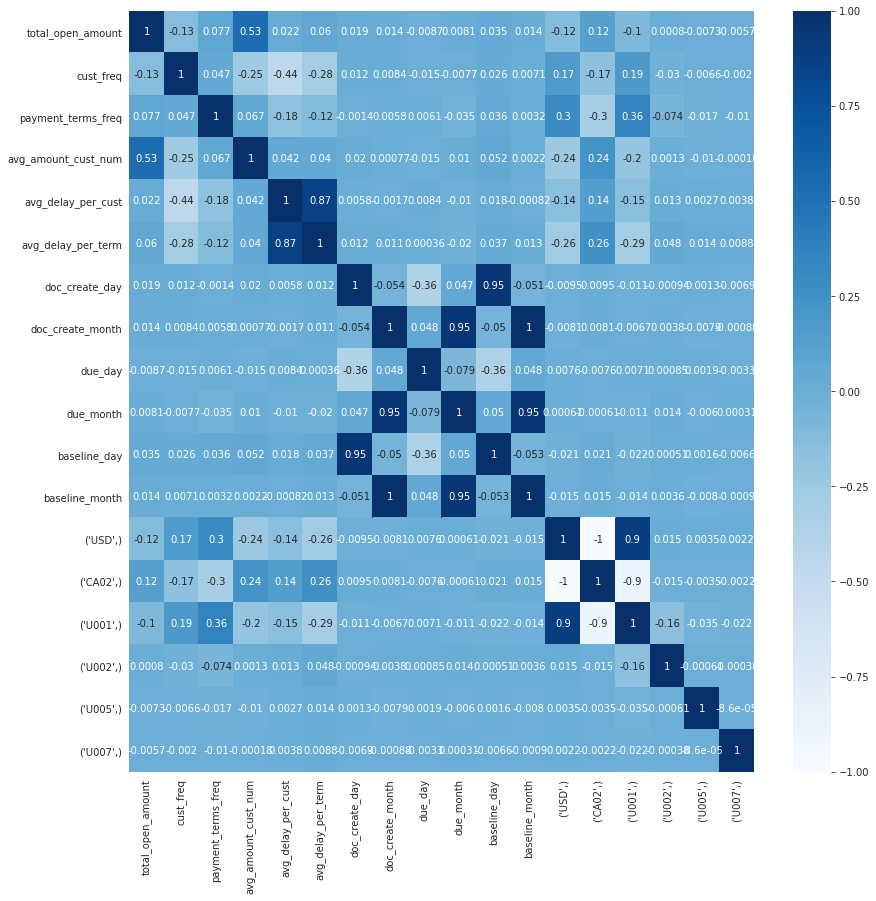

In [524]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation_matrix_minmax, cmap = "Blues",annot=True)

In [525]:
correlated_features = set()
for i in range(len(correlation_matrix_minmax .columns)):
    for j in range(i):
        if abs(correlation_matrix_minmax.iloc[i, j]) > 0.8:
            colname = correlation_matrix_minmax.columns[i]
            correlated_features.add(colname)

In [526]:
correlated_features

{('CA02',),
 ('U001',),
 'avg_delay_per_term',
 'baseline_day',
 'baseline_month',
 'due_month'}

These are highly correlated columns. Hence we will drop them

### Embedded Methods

Since this is a regression task we will use lasso from linear model

Lasso or L1 regularization has shrinks some of the coefficients to zero, therefore indicating that a certain predictor or certain features will be multiplied by zero to estimate the target. Thus, it won’t be added to the final prediction of the target—this means that these features can be removed because they aren’t contributing to the final prediction.

In [527]:
selection = SelectFromModel(Lasso())
selection.fit(X_train_scaled, y_train)

SelectFromModel(estimator=Lasso())

In [528]:
selected_features_scaled = X_train_scaled.columns[(selection.get_support())]

In [529]:
selected_features_scaled

Index(['avg_delay_per_cust', 'avg_delay_per_term', 'doc_create_day',
       'due_day'],
      dtype='object')

Applying Lasso on Minmax

In [530]:
selection = SelectFromModel(Lasso())
selection.fit(X_train_minmax, y_train)

SelectFromModel(estimator=Lasso())

In [531]:
selected_features_minmax = X_train_minmax.columns[(selection.get_support())]

In [532]:
selected_features_minmax

Index(['avg_delay_per_cust', 'avg_delay_per_term', 'doc_create_day',
       'due_day'],
      dtype='object')

Random forests provide us with feature importance using straightforward methods — mean decrease impurity and mean decrease accuracy.

In [533]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train_scaled, y_train)

ExtraTreesRegressor()

In [534]:
print(selection.feature_importances_)

[1.27136375e-01 5.97341751e-02 2.74559873e-02 3.70140752e-02
 2.41036218e-01 2.20646402e-01 5.16840469e-02 4.00895321e-02
 5.40137349e-02 4.17538094e-02 4.96858138e-02 3.90923940e-02
 1.48259053e-03 1.91902947e-03 6.76295250e-03 2.45422544e-04
 2.46087185e-04 1.35403526e-06]


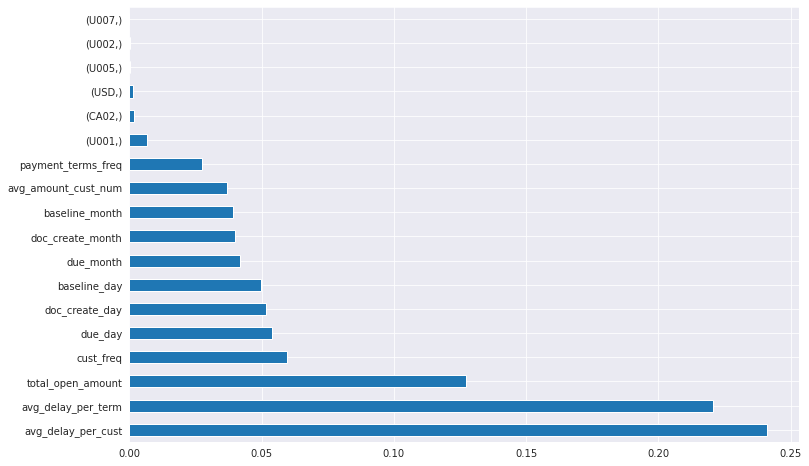

In [535]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### A Note about selecting features.

This graph tells us how important which feature is to target variable. We see here that all the one-hot encoded arent that important.

We see that avg_delay_per_cust and and avg_delay_per_term are very important features but on testing with test set we find that they are very performing poorly when used in validation set probably due to overfitting as mean encoding is very prone to that. Hence we use these features as they provide the best RMSE score on validation set

In [536]:
features = [ 'total_open_amount','cust_freq','payment_terms_freq',"doc_create_day","due_day"]

In [537]:
X_train_scaled_1 =  X_train_scaled[features].copy()

In [538]:
X_train_scaled_1

,total_open_amount,cust_freq,payment_terms_freq,doc_create_day,due_day
0,-0.415834,0.216504,0.259772,30,14
1,1.425705,0.006732,0.404886,30,14
2,-0.282328,0.002660,0.404886,30,14
3,-0.330678,0.216504,0.259772,30,14
4,-0.805864,0.216504,0.259772,30,14
...,...,...,...,...,...
36835,1.413396,0.025461,0.259772,18,3
36836,0.018067,0.216504,0.259772,18,3
36837,2.663190,0.028366,0.033822,18,3
36838,-0.514878,0.015147,0.015309,18,18


In [539]:
X_train_minmax_1 =  X_train_minmax[features].copy()

In [540]:
X_train_minmax_1

,total_open_amount,cust_freq,payment_terms_freq,doc_create_day,due_day
0,0.021712,0.216504,0.259772,30,14
1,0.117201,0.006732,0.404886,30,14
2,0.028635,0.002660,0.404886,30,14
3,0.026128,0.216504,0.259772,30,14
4,0.001488,0.216504,0.259772,30,14
...,...,...,...,...,...
36835,0.116563,0.025461,0.259772,18,3
36836,0.044211,0.216504,0.259772,18,3
36837,0.181368,0.028366,0.033822,18,3
36838,0.016577,0.015147,0.015309,18,18


Selecting the same features for X_valid_1

In [541]:
X_valid_1_scaled_1 = X_valid_1_scaled[features].copy()

In [542]:
X_valid_1_scaled_1

,total_open_amount,cust_freq,payment_terms_freq,doc_create_day,due_day
0,0.055086,0.001846,0.404886,19,4
1,-0.464978,0.003393,0.019001,19,24
2,-0.825388,0.020955,0.404886,19,4
3,0.062144,0.000217,0.404886,19,4
4,-0.663688,0.003393,0.019001,19,9
...,...,...,...,...,...
4639,-0.667488,0.000190,0.007329,14,13
4640,0.673569,0.008225,0.078855,14,26
4641,0.283729,0.216504,0.259772,14,29
4642,0.934646,0.031515,0.005592,14,28


In [543]:
X_valid_1_minmax_1 = X_valid_1_minmax[features].copy()

In [544]:
X_valid_1_minmax_1

,total_open_amount,cust_freq,payment_terms_freq,doc_create_day,due_day
0,0.046131,0.001846,0.404886,19,4
1,0.019164,0.003393,0.019001,19,24
2,0.000476,0.020955,0.404886,19,4
3,0.046497,0.000217,0.404886,19,4
4,0.008860,0.003393,0.019001,19,9
...,...,...,...,...,...
4639,0.008663,0.000190,0.007329,14,13
4640,0.078201,0.008225,0.078855,14,26
4641,0.057987,0.216504,0.259772,14,29
4642,0.091738,0.031515,0.005592,14,28


## Hyperparameter Tuning

As this is a regression model we will use the following models:-
- Linear Regressor
- SVR
- Decision Tree
- Random Forest
- XgBoost

Here we will first fit all the models on train_set and validation set and see r2,rmse,mae,mse score of each model. Based on which performs the best we will then tune the hyperparameters of the model to get even better score

Now deciding which metric is the best for checking if our model is performing good or not.
- MAE : MAE can be a good metric when we arent worried much about outliers
- MSE : Penalises large errors. If we think there are outliers in our data which can affect the model we should look for these. In general this isnt as useful as RMSE.
- RMSE : RMSE penalise large errors but it also helps us in identifying if our outliers are affecting our model. It gives us error in the same unit as outcome
- R2 score : R² tells you how much variance your model accounts for. It’s handy because the R² for any regression problem will immediately provide some understanding of how well the model is performing.

I think we should look for RMSE score and MAE score in our model as although we arent considering the outliers that we found on applying formula as outliers there are still some points in our data which are b/w 100 and 400. Since our dataset is very large this wont affect the model much 

In [ ]:
linear_reg = LinearRe